##### Problem:- You will be predicting the costs of used cars given the data collected from various sources and distributed across    various locations in India.

###### FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
Train=pd.read_excel('Data_Train.xlsx')
Test=pd.read_excel('Data_Test.xlsx')

In [3]:
Train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [4]:
Test.head(25)

Name    Location  Year  \
0                     Maruti Alto K10 LXI CNG       Delhi  2014   
1               Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2   Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                        Toyota Etios Liva GD   Hyderabad  2012   
4                           Hyundai i20 Magna      Mumbai  2014   
5                      Mahindra XUV500 W8 2WD  Coimbatore  2016   
6         Toyota Fortuner 4x2 AT TRD Sportivo        Pune  2015   
7                        Hyundai EON Era Plus      Jaipur  2013   
8                         Honda City 1.5 S MT      Mumbai  2011   
9                      Mahindra XUV500 W6 2WD  Coimbatore  2015   
10                  Audi Q5 2008-2012 2.0 TDI      Mumbai  2012   
11                    Hyundai Grand i10 Magna      Jaipur  2016   
12                          Toyota Corolla H5     Chennai  2007   
13                     Maruti Swift Vdi BSIII  Coimbatore  2008   
14                          Nissan Terrano XL      Mumbai  2014   
15                           BMW X1 sDrive20d  Coimbatore  2013   
16           BMW 3 Series GT 320d Luxury Line   Hyderabad  2015   
17                Ford Ikon 1.4 TDCi DuraTorq     Chennai  2009   
18                       Maruti Swift AMT ZXI       Kochi  2019   
19                     Maruti Swift Dzire VXi      Jaipur  2015   
20                            Maruti Ritz LDi        Pune  2016   
21                            Nissan Micra XV       Delhi  2010   
22              Maruti Alto 800 2016-2019 LXI       Kochi  2017   
23               Skoda Laura 1.8 TSI Ambition   Bangalore  2009   
24     Honda Civic 2010-2013 1.8 S MT Inspire   Bangalore  2011   

    Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0               40929       CNG       Manual      First  32.26 km/kg   998 CC   
1               54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2               34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3              139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4               29000    Petrol       Manual      First    18.5 kmpl  1197 CC   
5               85609    Diesel       Manual     Second    16.0 kmpl  2179 CC   
6               59000    Diesel    Automatic      First   12.55 kmpl  2982 CC   
7               65000    Petrol       Manual      First    21.1 kmpl   814 CC   
8               66000    Petrol       Manual     Second    17.0 kmpl  1497 CC   
9               54684    Diesel       Manual      First    15.1 kmpl  2179 CC   
10              78000    Diesel    Automatic     Second    12.8 kmpl  1968 CC   
11              21000    Petrol       Manual      First    18.9 kmpl  1197 CC   
12              90000    Petrol       Manual      Third    13.4 kmpl  1794 CC   
13              87628    Diesel       Manual      First    17.8 kmpl  1248 CC   
14              45000    Petrol       Manual      First   13.24 kmpl  1598 CC   
15              30788    Diesel    Automatic      First   17.05 kmpl  1995 CC   
16              39524    Diesel    Automatic      First   19.59 kmpl  1995 CC   
17             140000    Diesel       Manual      First    13.8 kmpl  1399 CC   
18              15409    Petrol    Automatic      First    22.0 kmpl  1197 CC   
19              36502    Petrol       Manual      First    17.5 kmpl  1298 CC   
20             200000    Diesel       Manual      First    23.2 kmpl  1248 CC   
21              70000    Petrol       Manual      First   18.06 kmpl  1198 CC   
22              36701    Petrol       Manual      First    24.7 kmpl   796 CC   
23              72000    Petrol       Manual     Second    17.5 kmpl      NaN   
24              40000    Petrol       Manual     Second    15.5 kmpl  1799 CC   

        Power  Seats  
0    58.2 bhp    4.0  
1    47.3 bhp    5.0  
2   147.8 bhp    7.0  
3    null bhp    5.0  
4   82.85 bhp    5.0  
5     140 bhp    7.0  
6   168.7 bhp    7.0  
7    55

In [5]:
Test.shape ,Train.shape

((1234, 11), (6019, 12))

In [6]:
Train.duplicated().sum()


0

In [7]:
Test_copy=Test.copy()

# Data Cleaning & Imputing Missing Values

In [8]:
Test[Test.duplicated()]
Test[Test['Name'].str.contains("Honda City 1.5 E MT")]

Name   Location  Year  Kilometers_Driven Fuel_Type  \
287  Honda City 1.5 E MT  Hyderabad  2009              66000    Petrol   
294  Honda City 1.5 E MT       Pune  2012              88000    Petrol   
479  Honda City 1.5 E MT     Mumbai  2010              52000    Petrol   
563  Honda City 1.5 E MT     Mumbai  2010              52000    Petrol   
767  Honda City 1.5 E MT  Ahmedabad  2011              65000    Petrol   
897  Honda City 1.5 E MT  Ahmedabad  2011              52000    Petrol   

    Transmission Owner_Type    Mileage   Engine    Power  Seats  
287       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0  
294       Manual      Third  17.0 kmpl  1497 CC  118 bhp    5.0  
479       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0  
563       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0  
767       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0  
897       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0

In [9]:
#removing unit of Mileage column
for Unit in ['km/kg','kmpl']:
    Train.Mileage = Train.Mileage.str.replace(Unit,' ')
Train.Mileage=Train.Mileage.astype(float)

#creating new columns
Train['Mileage_per_kg']=[0.0 for i in range(len(Train.Mileage))]
Train['Mileage_per_l']=[0.0 for i in range(len(Train.Mileage))]
Train
for i in range(len(Train)):
    if (Train['Fuel_Type'][i]=='CNG'):
        Train['Mileage_per_kg'][i]=Train['Mileage'][i]
    if (Train['Fuel_Type'][i]=='LPG'):
        Train['Mileage_per_kg'][i]=Train['Mileage'][i]
    if (Train['Fuel_Type'][i]=='Petrol'):
        Train['Mileage_per_l'][i]=Train['Mileage'][i]
    if (Train['Fuel_Type'][i]=='Diesel'):
        Train['Mileage_per_l'][i]=Train['Mileage'][i]
    if (Train['Fuel_Type'][i]=='Electric'):
        Train['Mileage_per_l'][i]=0
        Train['Mileage_per_kg'][i]=0
Train['Mileage_per_kg']=Train['Mileage_per_kg'].astype(float)

Train['Mileage_per_l']=Train['Mileage_per_l'].astype(float)
Train

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage   Engine      Power  Seats  \
0          CNG       Manual      First    26.60   998 CC  58.16 bhp    5.0   
1       Diesel       Manual      First    19.67  1582 CC  126.2 bhp    5.0   
2       Petrol       Manual      First    18.20  1199 CC   88.7 bhp    5.0   
3       Diesel       Manual      First    20.77  1248 CC  88.76 bhp    7.0   
4       Diesel    Automatic     Second    15.20  1968 CC  140.8 bhp    5.0   
...        ...          ...        ...      ...      ...        ...    ...   
6014    Diesel       Manual      First    28.40  1248 CC     74 bhp    5.0   
6015    Diesel       Manual      First    24.40  1120 CC     71 bhp    5.0   
6016    Diesel       Manual     Second    14.00  2498 CC    112 bhp    8.0   
6017    Petrol       Manual      First    18.90   998 CC   67.1 bhp    5.0   
6018    Diesel       Manual      First    25.44   936 CC   57.6 bhp    5.0   

      Price  Mileage_per_kg  Mileage_per_l  
0      1.75            26.6           0.00  
1     12.50             0.0          19.67  
2      4.50             0.0          18.20  
3      6.00             0.0          20.77  
4     17.74             0.0          15.20  
...     ...             ...            ...  
6014   4.75             0.0          28.40  
6015   4.00             0.0          24.40  
6016   2.90             0.0          14.00  
6017   2.65             0.0          18.90  
6018   2.50             0.0          25.44  

[6019 rows x 14 columns]

In [10]:
Train['Fuel_Type'].unique()
Test['Fuel_Type'].unique()
Test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [11]:
#removing unit of Mileage column in test data
for Unit in ['km/kg','kmpl']:
    Test.Mileage = Test.Mileage.str.replace(Unit,' ')
Test.Mileage=Test.Mileage.astype(float)
Test
#creating new columns in test data
Test['Mileage_per_kg']=[0.0 for i in range(len(Test.Mileage))]
Test['Mileage_per_l']=[0.0 for i in range(len(Test.Mileage))]
Test
for i in range(len(Test)):
    if (Test['Fuel_Type'][i]=='CNG'):
        Test['Mileage_per_kg'][i]=Test['Mileage'][i]
    if (Test['Fuel_Type'][i]=='LPG'):
        Test['Mileage_per_kg'][i]=Test['Mileage'][i]
    if (Test['Fuel_Type'][i]=='Petrol'):
        Test['Mileage_per_l'][i]=Test['Mileage'][i]
    if (Test['Fuel_Type'][i]=='Diesel'):
        Test['Mileage_per_l'][i]=Test['Mileage'][i]
    if (Test['Fuel_Type'][i]=='Electric'):
        Test['Mileage_per_l'][i]=0
        Test['Mileage_per_kg'][i]=0
        
Test['Mileage_per_kg']=Test['Mileage_per_kg'].astype(float)

Test['Mileage_per_l']=Test['Mileage_per_l'].astype(float)
Test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage   Engine  \
0                 40929       CNG       Manual      First    32.26   998 CC   
1                 54493    Petrol       Manual     Second    24.70   796 CC   
2                 34000    Diesel       Manual      First    13.68  2393 CC   
3                139000    Diesel       Manual      First    23.59  1364 CC   
4                 29000    Petrol       Manual      First    18.50  1197 CC   
...                 ...       ...          ...        ...      ...      ...   
1229              89411    Diesel       Manual      First    20.54  1598 CC   
1230              59000    Petrol    Automatic      First    17.21  1197 CC   
1231              28000    Diesel       Manual      First    23.08  1461 CC   
1232              52262    Petrol    Automatic      Third    17.20  1197 CC   
1233              72443    Diesel    Automatic      First    10.00  2148 CC   

          Power  Seats  Mileage_per_kg  Mileage_per_l  
0      58.2 bhp    4.0           32.26           0.00  
1      47.3 bhp    5.0            0.00          24.70  
2     147.8 bhp    7.0            0.00          13.68  
3      null bhp    5.0            0.00          23.59  
4     82.85 bhp    5.0            0.00          18.50  
...         ...    ...             ...            ...  
1229  103.6 bhp    5.0            0.00          20.54  
1230  103.6 bhp    5.0            0.00          17.21  
1231   63.1 bhp    5.0            0.00          23.08  
1232  103.6 bhp    5.0            0.00          17.20  
1233    170 bhp    5.0            0.00          10.00  

[1234 rows x 13 columns]

In [12]:
#removing units from Mileage,Power,Engine

Train['Engine']=Train['Engine'].str.strip('CC')
Train['Power']=Train['Power'].str.strip('bhp')
Train


Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage Engine   Power  Seats  Price  \
0          CNG       Manual      First    26.60   998   58.16     5.0   1.75   
1       Diesel       Manual      First    19.67  1582   126.2     5.0  12.50   
2       Petrol       Manual      First    18.20  1199    88.7     5.0   4.50   
3       Diesel       Manual      First    20.77  1248   88.76     7.0   6.00   
4       Diesel    Automatic     Second    15.20  1968   140.8     5.0  17.74   
...        ...          ...        ...      ...    ...     ...    ...    ...   
6014    Diesel       Manual      First    28.40  1248      74     5.0   4.75   
6015    Diesel       Manual      First    24.40  1120      71     5.0   4.00   
6016    Diesel       Manual     Second    14.00  2498     112     8.0   2.90   
6017    Petrol       Manual      First    18.90   998    67.1     5.0   2.65   
6018    Diesel       Manual      First    25.44   936    57.6     5.0   2.50   

      Mileage_per_kg  Mileage_per_l  
0               26.6           0.00  
1                0.0          19.67  
2                0.0          18.20  
3                0.0          20.77  
4                0.0          15.20  
...              ...            ...  
6014             0.0          28.40  
6015             0.0          24.40  
6016             0.0          14.00  
6017             0.0          18.90  
6018             0.0          25.44  

[6019 rows x 14 columns]

In [13]:
Test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage   Engine  \
0                 40929       CNG       Manual      First    32.26   998 CC   
1                 54493    Petrol       Manual     Second    24.70   796 CC   
2                 34000    Diesel       Manual      First    13.68  2393 CC   
3                139000    Diesel       Manual      First    23.59  1364 CC   
4                 29000    Petrol       Manual      First    18.50  1197 CC   
...                 ...       ...          ...        ...      ...      ...   
1229              89411    Diesel       Manual      First    20.54  1598 CC   
1230              59000    Petrol    Automatic      First    17.21  1197 CC   
1231              28000    Diesel       Manual      First    23.08  1461 CC   
1232              52262    Petrol    Automatic      Third    17.20  1197 CC   
1233              72443    Diesel    Automatic      First    10.00  2148 CC   

          Power  Seats  Mileage_per_kg  Mileage_per_l  
0      58.2 bhp    4.0           32.26           0.00  
1      47.3 bhp    5.0            0.00          24.70  
2     147.8 bhp    7.0            0.00          13.68  
3      null bhp    5.0            0.00          23.59  
4     82.85 bhp    5.0            0.00          18.50  
...         ...    ...             ...            ...  
1229  103.6 bhp    5.0            0.00          20.54  
1230  103.6 bhp    5.0            0.00          17.21  
1231   63.1 bhp    5.0            0.00          23.08  
1232  103.6 bhp    5.0            0.00          17.20  
1233    170 bhp    5.0            0.00          10.00  

[1234 rows x 13 columns]

In [14]:
#removing Units from Test data

Test['Engine']=Test['Engine'].str.strip('CC')
Test['Power']=Test['Power'].str.strip('bhp')
Test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0                 40929       CNG       Manual      First    32.26   998    
1                 54493    Petrol       Manual     Second    24.70   796    
2                 34000    Diesel       Manual      First    13.68  2393    
3                139000    Diesel       Manual      First    23.59  1364    
4                 29000    Petrol       Manual      First    18.50  1197    
...                 ...       ...          ...        ...      ...    ...   
1229              89411    Diesel       Manual      First    20.54  1598    
1230              59000    Petrol    Automatic      First    17.21  1197    
1231              28000    Diesel       Manual      First    23.08  1461    
1232              52262    Petrol    Automatic      Third    17.20  1197    
1233              72443    Diesel    Automatic      First    10.00  2148    

       Power  Seats  Mileage_per_kg  Mileage_per_l  
0      58.2     4.0           32.26           0.00  
1      47.3     5.0            0.00          24.70  
2     147.8     7.0            0.00          13.68  
3      null     5.0            0.00          23.59  
4     82.85     5.0            0.00          18.50  
...      ...    ...             ...            ...  
1229  103.6     5.0            0.00          20.54  
1230  103.6     5.0            0.00          17.21  
1231   63.1     5.0            0.00          23.08  
1232  103.6     5.0            0.00          17.20  
1233    170     5.0            0.00          10.00  

[1234 rows x 13 columns]

In [15]:
#Spliting Name 
Train['Brand']=Train['Name'].str.split(' ').str[0]
Train['Model']=Train['Name'].str.split(' ').str[1]
Train['Version']=Train['Name'].str.split(' ').str[2:7].str.join(" ") 
Train


Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage Engine   Power  Seats  Price  \
0          CNG       Manual      First    26.60   998   58.16     5.0   1.75   
1       Diesel       Manual      First    19.67  1582   126.2     5.0  12.50   
2       Petrol       Manual      First    18.20  1199    88.7     5.0   4.50   
3       Diesel       Manual      First    20.77  1248   88.76     7.0   6.00   
4       Diesel    Automatic     Second    15.20  1968   140.8     5.0  17.74   
...        ...          ...        ...      ...    ...     ...    ...    ...   
6014    Diesel       Manual      First    28.40  1248      74     5.0   4.75   
6015    Diesel       Manual      First    24.40  1120      71     5.0   4.00   
6016    Diesel       Manual     Second    14.00  2498     112     8.0   2.90   
6017    Petrol       Manual      First    18.90   998    67.1     5.0   2.65   
6018    Diesel       Manual      First    25.44   936    57.6     5.0   2.50   

      Mileage_per_kg  Mileage_per_l      Brand   Model  \
0               26.6           0.00     Maruti   Wagon   
1                0.0          19.67    Hyundai   Creta   
2                0.0          18.20      Honda    Jazz   
3                0.0          20.77     Maruti  Ertiga   
4                0.0          15.20       Audi      A4   
...              ...            ...        ...     ...   
6014             0.0          28.40     Maruti   Swift   
6015             0.0          24.40    Hyundai   Xcent   
6016             0.0          14.00   Mahindra    Xylo   
6017             0.0          18.90     Maruti   Wagon   
6018             0.0          25.44  Chevrolet    Beat   

                      Version  
0                   R LXI CNG  
1          1.6 CRDi SX Option  
2                           V  
3                         VDI  
4     New 2.0 TDI Multitronic  
...                       ...  
6014                      VDI  
6015               1.1 CRDi S  
6016                  D4 BSIV  
6017                    R VXI  
6018                   Diesel  

[6019 rows x 17 columns]

In [16]:
#Spliting Name in Test Data
Test['Brand']=Test['Name'].str.split(' ').str[0]
Test['Model']=Test['Name'].str.split(' ').str[1]
Test['Version']=Test['Name'].str.split(' ').str[2:7].str.join(" ") 
Test


Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0                 40929       CNG       Manual      First    32.26   998    
1                 54493    Petrol       Manual     Second    24.70   796    
2                 34000    Diesel       Manual      First    13.68  2393    
3                139000    Diesel       Manual      First    23.59  1364    
4                 29000    Petrol       Manual      First    18.50  1197    
...                 ...       ...          ...        ...      ...    ...   
1229              89411    Diesel       Manual      First    20.54  1598    
1230              59000    Petrol    Automatic      First    17.21  1197    
1231              28000    Diesel       Manual      First    23.08  1461    
1232              52262    Petrol    Automatic      Third    17.20  1197    
1233              72443    Diesel    Automatic      First    10.00  2148    

       Power  Seats  Mileage_per_kg  Mileage_per_l          Brand    Model  \
0      58.2     4.0           32.26           0.00         Maruti     Alto   
1      47.3     5.0            0.00          24.70         Maruti     Alto   
2     147.8     7.0            0.00          13.68         Toyota   Innova   
3      null     5.0            0.00          23.59         Toyota    Etios   
4     82.85     5.0            0.00          18.50        Hyundai      i20   
...      ...    ...             ...            ...            ...      ...   
1229  103.6     5.0            0.00          20.54     Volkswagen    Vento   
1230  103.6     5.0            0.00          17.21     Volkswagen     Polo   
1231   63.1     5.0            0.00          23.08         Nissan    Micra   
1232  103.6     5.0            0.00          17.20     Volkswagen     Polo   
1233    170     5.0            0.00          10.00  Mercedes-Benz  E-Class   

                             Version  
0                        K10 LXI CNG  
1                  800 2016-2019 LXI  
2        Crysta Touring Sport 2.4 MT  
3                            Liva GD  
4                              Magna  
...                              ...  
1229                Diesel Trendline  
1230                          GT TSI  
1231                       Diesel XV  
1232                          GT TSI  
1233  2009-2013 E 220 CDI Avantgarde  

[1234 rows x 16 columns]

Dealing with null/missing values

In [17]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Mileage_per_kg     6019 non-null   float64
 13  Mileage_per_l      6019 non-null   float64
 14  Brand              6019 non-null   object 
 15  Model              6019 non-null   object 
 16  Version            6019 

In [18]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  Mileage_per_kg     1234 non-null   float64
 12  Mileage_per_l      1234 non-null   float64
 13  Brand              1234 non-null   object 
 14  Model              1234 non-null   object 
 15  Version            1234 non-null   object 
dtypes: float64(4), int64(2),

In [19]:
Train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Mileage_per_kg        0
Mileage_per_l         0
Brand                 0
Model                 0
Version               0
dtype: int64

In [20]:
#Imputing Null Values in Power
for i in range(len(Train)):
     if (Train['Power'][i]=='null '):
        Train['Power'][i]=0.0
Train['Power']=Train['Power'].astype(float)        
        
for i in range(len(Test)):
     if (Test['Power'][i]=='null '):
        Test['Power'][i]=0.0
        
Test['Power']=Test['Power'].astype(float)        


In [21]:
#set of columns which contains null values
Null_column_Train = ["Mileage","Engine","Power","Seats"] 
Null_column_Test = ["Engine","Power","Seats"] 

In [22]:
# Defining a function for Replacing null values
def Null_replacing_Fun(dataset , Null_column):
    for i in range(len(Null_column)):
       dataset[Null_column[i]].fillna(dataset[Null_column[i]].mode()[0] , inplace = True)

    print(dataset)

In [23]:
#calling funtion to null replacing for Train Data 
Null_replacing_Fun(Train , Null_column_Train)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage Eng

In [24]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   object 
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Mileage_per_kg     6019 non-null   float64
 13  Mileage_per_l      6019 non-null   float64
 14  Brand              6019 non-null   object 
 15  Model              6019 non-null   object 
 16  Version            6019 

In [25]:
Train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Mileage_per_kg       0
Mileage_per_l        0
Brand                0
Model                0
Version              0
dtype: int64

In [26]:
#calling function for Test data set
Null_replacing_Fun(Test , Null_column_Test)

                                                   Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  

In [27]:
Test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Mileage_per_kg       0
Mileage_per_l        0
Brand                0
Model                0
Version              0
dtype: int64

In [28]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   object 
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
 11  Mileage_per_kg     1234 non-null   float64
 12  Mileage_per_l      1234 non-null   float64
 13  Brand              1234 non-null   object 
 14  Model              1234 non-null   object 
 15  Version            1234 non-null   object 
dtypes: float64(5), int64(2),

In [29]:
Test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0                 40929       CNG       Manual      First    32.26   998    
1                 54493    Petrol       Manual     Second    24.70   796    
2                 34000    Diesel       Manual      First    13.68  2393    
3                139000    Diesel       Manual      First    23.59  1364    
4                 29000    Petrol       Manual      First    18.50  1197    
...                 ...       ...          ...        ...      ...    ...   
1229              89411    Diesel       Manual      First    20.54  1598    
1230              59000    Petrol    Automatic      First    17.21  1197    
1231              28000    Diesel       Manual      First    23.08  1461    
1232              52262    Petrol    Automatic      Third    17.20  1197    
1233              72443    Diesel    Automatic      First    10.00  2148    

       Power  Seats  Mileage_per_kg  Mileage_per_l          Brand    Model  \
0      58.20    4.0           32.26           0.00         Maruti     Alto   
1      47.30    5.0            0.00          24.70         Maruti     Alto   
2     147.80    7.0            0.00          13.68         Toyota   Innova   
3       0.00    5.0            0.00          23.59         Toyota    Etios   
4      82.85    5.0            0.00          18.50        Hyundai      i20   
...      ...    ...             ...            ...            ...      ...   
1229  103.60    5.0            0.00          20.54     Volkswagen    Vento   
1230  103.60    5.0            0.00          17.21     Volkswagen     Polo   
1231   63.10    5.0            0.00          23.08         Nissan    Micra   
1232  103.60    5.0            0.00          17.20     Volkswagen     Polo   
1233  170.00    5.0            0.00          10.00  Mercedes-Benz  E-Class   

                             Version  
0                        K10 LXI CNG  
1                  800 2016-2019 LXI  
2        Crysta Touring Sport 2.4 MT  
3                            Liva GD  
4                              Magna  
...                              ...  
1229                Diesel Trendline  
1230                          GT TSI  
1231                       Diesel XV  
1232                          GT TSI  
1233  2009-2013 E 220 CDI Avantgarde  

[1234 rows x 16 columns]

In [30]:
Test.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0              40929       CNG       Manual      First    32.26   998    
1              54493    Petrol       Manual     Second    24.70   796    
2              34000    Diesel       Manual      First    13.68  2393    
3             139000    Diesel       Manual      First    23.59  1364    
4              29000    Petrol       Manual      First    18.50  1197    

    Power  Seats  Mileage_per_kg  Mileage_per_l    Brand   Model  \
0   58.20    4.0           32.26           0.00   Maruti    Alto   
1   47.30    5.0            0.00          24.70   Maruti    Alto   
2  147.80    7.0            0.00          13.68   Toyota  Innova   
3    0.00    5.0            0.00          23.59   Toyota   Etios   
4   82.85    5.0            0.00          18.50  Hyundai     i20   

                       Version  
0                  K10 LXI CNG  
1            800 2016-2019 LXI  
2  Crysta Touring Sport 2.4 MT  
3                      Liva GD  
4                        Magna

In [31]:
#creating Age of car column
Train['Age']=2020-Train['Year']
Train

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage Engine   Power  Seats  Price  \
0          CNG       Manual      First    26.60   998    58.16    5.0   1.75   
1       Diesel       Manual      First    19.67  1582   126.20    5.0  12.50   
2       Petrol       Manual      First    18.20  1199    88.70    5.0   4.50   
3       Diesel       Manual      First    20.77  1248    88.76    7.0   6.00   
4       Diesel    Automatic     Second    15.20  1968   140.80    5.0  17.74   
...        ...          ...        ...      ...    ...     ...    ...    ...   
6014    Diesel       Manual      First    28.40  1248    74.00    5.0   4.75   
6015    Diesel       Manual      First    24.40  1120    71.00    5.0   4.00   
6016    Diesel       Manual     Second    14.00  2498   112.00    8.0   2.90   
6017    Petrol       Manual      First    18.90   998    67.10    5.0   2.65   
6018    Diesel       Manual      First    25.44   936    57.60    5.0   2.50   

      Mileage_per_kg  Mileage_per_l      Brand   Model  \
0               26.6           0.00     Maruti   Wagon   
1                0.0          19.67    Hyundai   Creta   
2                0.0          18.20      Honda    Jazz   
3                0.0          20.77     Maruti  Ertiga   
4                0.0          15.20       Audi      A4   
...              ...            ...        ...     ...   
6014             0.0          28.40     Maruti   Swift   
6015             0.0          24.40    Hyundai   Xcent   
6016             0.0          14.00   Mahindra    Xylo   
6017             0.0          18.90     Maruti   Wagon   
6018             0.0          25.44  Chevrolet    Beat   

                      Version  Age  
0                   R LXI CNG   10  
1          1.6 CRDi SX Option    5  
2                           V    9  
3                         VDI    8  
4     New 2.0 TDI Multitronic    7  
...                       ...  ...  
6014                      VDI    6  
6015               1.1 CRDi S    5  
6016                  D4 BSIV    8  
6017                    R VXI    7  
6018                   Diesel    9  

[6019 rows x 18 columns]

In [32]:
#creating Age of car column
Test['Age']=2020-Test['Year']
Test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0                 40929       CNG       Manual      First    32.26   998    
1                 54493    Petrol       Manual     Second    24.70   796    
2                 34000    Diesel       Manual      First    13.68  2393    
3                139000    Diesel       Manual      First    23.59  1364    
4                 29000    Petrol       Manual      First    18.50  1197    
...                 ...       ...          ...        ...      ...    ...   
1229              89411    Diesel       Manual      First    20.54  1598    
1230              59000    Petrol    Automatic      First    17.21  1197    
1231              28000    Diesel       Manual      First    23.08  1461    
1232              52262    Petrol    Automatic      Third    17.20  1197    
1233              72443    Diesel    Automatic      First    10.00  2148    

       Power  Seats  Mileage_per_kg  Mileage_per_l          Brand    Model  \
0      58.20    4.0           32.26           0.00         Maruti     Alto   
1      47.30    5.0            0.00          24.70         Maruti     Alto   
2     147.80    7.0            0.00          13.68         Toyota   Innova   
3       0.00    5.0            0.00          23.59         Toyota    Etios   
4      82.85    5.0            0.00          18.50        Hyundai      i20   
...      ...    ...             ...            ...            ...      ...   
1229  103.60    5.0            0.00          20.54     Volkswagen    Vento   
1230  103.60    5.0            0.00          17.21     Volkswagen     Polo   
1231   63.10    5.0            0.00          23.08         Nissan    Micra   
1232  103.60    5.0            0.00          17.20     Volkswagen     Polo   
1233  170.00    5.0            0.00          10.00  Mercedes-Benz  E-Class   

                             Version  Age  
0                        K10 LXI CNG    6  
1                  800 2016-2019 LXI    7  
2        Crysta Touring Sport 2.4 MT    3  
3                            Liva GD    8  
4                              Magna    6  
...                              ...  ...  
1229                Diesel Trendline    9  
1230                          GT TSI    5  
1231                       Diesel XV    8  
1232                          GT TSI    7  
1233  2009-2013 E 220 CDI Avantgarde    6  

[1234 rows x 17 columns]

In [33]:
Train['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [34]:
Test['Name'].unique()

array(['Maruti Alto K10 LXI CNG', 'Maruti Alto 800 2016-2019 LXI',
       'Toyota Innova Crysta Touring Sport 2.4 MT',
       'Toyota Etios Liva GD', 'Hyundai i20 Magna',
       'Mahindra XUV500 W8 2WD', 'Toyota Fortuner 4x2 AT TRD Sportivo',
       'Hyundai EON Era Plus', 'Honda City 1.5 S MT',
       'Mahindra XUV500 W6 2WD', 'Audi Q5 2008-2012 2.0 TDI',
       'Hyundai Grand i10 Magna', 'Toyota Corolla H5',
       'Maruti Swift Vdi BSIII', 'Nissan Terrano XL', 'BMW X1 sDrive20d',
       'BMW 3 Series GT 320d Luxury Line', 'Ford Ikon 1.4 TDCi DuraTorq',
       'Maruti Swift AMT ZXI', 'Maruti Swift Dzire VXi',
       'Maruti Ritz LDi', 'Nissan Micra XV',
       'Skoda Laura 1.8 TSI Ambition',
       'Honda Civic 2010-2013 1.8 S MT Inspire', 'Ford Ikon 1.3 Flair',
       'Maruti Alto LX', 'Honda Jazz 1.5 V i DTEC',
       'Skoda Rapid 1.5 TDI AT Ambition', 'Hyundai i20 1.2 Sportz',
       'Toyota Etios Cross 1.4L VD', 'Volkswagen Polo GT TDI',
       'Hyundai i10 Era 1.1 iTech SE', 'Mi

In [35]:
Train[Train['Mileage'].isnull()]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price, Mileage_per_kg, Mileage_per_l, Brand, Model, Version, Age]
Index: []

In [36]:
Train[Train['Power'].isnull()]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price, Mileage_per_kg, Mileage_per_l, Brand, Model, Version, Age]
Index: []

In [37]:
Train['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Fiat Petra 1.2 EL                       1
Volkswagen Polo 1.0 MPI Comfortline     1
Fiat Siena 1.2 ELX                      1
Mahindra Scorpio VLX 2WD AT BSIV        1
Volkswagen Vento Diesel Breeze          1
Name: Name, Length: 1876, dtype: int64

In [38]:
Test['Name'].value_counts()

Maruti Alto LXi                     9
Volkswagen Polo 1.2 MPI Highline    8
Maruti Swift Dzire VDI              8
Honda City 1.5 V MT                 8
Hyundai i10 Magna                   7
                                   ..
Volvo XC60 D4 SUMMUM                1
Maruti Swift VVT ZXI                1
Mahindra Xylo E9                    1
Honda Accord VTi-L (AT)             1
Hyundai Elantra 1.6 SX              1
Name: Name, Length: 768, dtype: int64

## EDA And Visualization

#### Droping outliners

In [39]:
#removing outliners
print(Train[Train['Seats']<2])
Train.drop(Train[Train['Seats']<2].index,inplace= True)
Train[Train['Seats']<2]

                                   Name   Location  Year  Kilometers_Driven  \
3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012             125000   

     Fuel_Type Transmission Owner_Type  Mileage Engine  Power  Seats  Price  \
3999    Petrol    Automatic      First     10.5  3197     0.0    0.0   18.0   

      Mileage_per_kg  Mileage_per_l Brand Model                    Version  \
3999             0.0           10.5  Audi    A4  3.2 FSI Tiptronic Quattro   

      Age  
3999    8  


Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price, Mileage_per_kg, Mileage_per_l, Brand, Model, Version, Age]
Index: []

In [40]:
Train[Train['Price']>100]

Name   Location  Year  \
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue  Hyderabad  2017   
5781                   Lamborghini Gallardo Coupe      Delhi  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
4079              25000    Diesel    Automatic      First    13.33  2993    
5781               6500    Petrol    Automatic      Third     6.40  5204    

      Power  Seats  Price  Mileage_per_kg  Mileage_per_l        Brand  \
4079  255.0    5.0  160.0             0.0          13.33         Land   
5781  560.0    2.0  120.0             0.0           6.40  Lamborghini   

         Model                     Version  Age  
4079     Rover  Range Rover 3.0 Diesel LWB    3  
5781  Gallardo                       Coupe    9

In [41]:
#Droping Outliners
Train=Train.drop(Train[Train['Price']>100].index)
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6016 non-null   object 
 1   Location           6016 non-null   object 
 2   Year               6016 non-null   int64  
 3   Kilometers_Driven  6016 non-null   int64  
 4   Fuel_Type          6016 non-null   object 
 5   Transmission       6016 non-null   object 
 6   Owner_Type         6016 non-null   object 
 7   Mileage            6016 non-null   float64
 8   Engine             6016 non-null   object 
 9   Power              6016 non-null   float64
 10  Seats              6016 non-null   float64
 11  Price              6016 non-null   float64
 12  Mileage_per_kg     6016 non-null   float64
 13  Mileage_per_l      6016 non-null   float64
 14  Brand              6016 non-null   object 
 15  Model              6016 non-null   object 
 16  Version            6016 

In [42]:
Train.describe()

Year  Kilometers_Driven      Mileage        Power        Seats  \
count  6016.000000       6.016000e+03  6016.000000  6016.000000  6016.000000   
mean   2013.358211       5.874166e+04    18.138602   110.924854     5.278258   
std       3.270032       9.128408e+04     4.578740    55.029682     0.802552   
min    1998.000000       1.710000e+02     0.000000     0.000000     2.000000   
25%    2011.000000       3.400000e+04    15.200000    74.000000     5.000000   
50%    2014.000000       5.300000e+04    18.155000    91.100000     5.000000   
75%    2016.000000       7.300000e+04    21.100000   138.030000     5.000000   
max    2019.000000       6.500000e+06    33.540000   552.000000    10.000000   

             Price  Mileage_per_kg  Mileage_per_l          Age  
count  6016.000000     6016.000000    6016.000000  6016.000000  
mean      9.434661        0.268826      17.864124     6.641789  
std      10.927967        2.633292       4.872972     3.270032  
min       0.440000        0.000000       0.000000     1.000000  
25%       3.500000        0.000000      15.100000     4.000000  
50%       5.635000        0.000000      18.000000     6.000000  
75%       9.950000        0.000000      20.920000     9.000000  
max     100.000000       33.540000      28.400000    22.000000

In [43]:
Train[Train['Kilometers_Driven']>800000]


Name Location  Year  Kilometers_Driven Fuel_Type  \
2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000    Diesel   

     Transmission Owner_Type  Mileage Engine  Power  Seats  Price  \
2328    Automatic      First    15.97  2993   258.0    5.0   65.0   

      Mileage_per_kg  Mileage_per_l Brand Model             Version  Age  
2328             0.0          15.97   BMW    X5  xDrive 30d M Sport    3

In [44]:

Train=Train.drop(Train[Train['Kilometers_Driven']>800000].index)

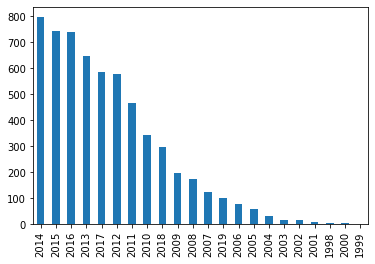

In [45]:
Train['Year'].value_counts().plot.bar()

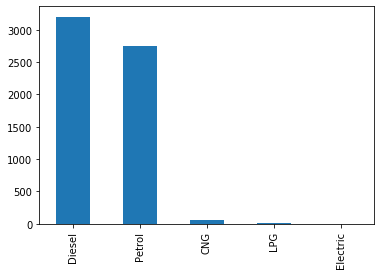

In [46]:
Train['Fuel_Type'].value_counts().plot.bar()

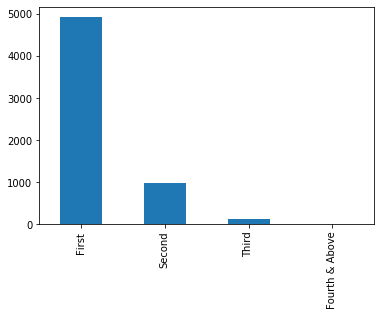

In [47]:
Train['Owner_Type'].value_counts().plot.bar()

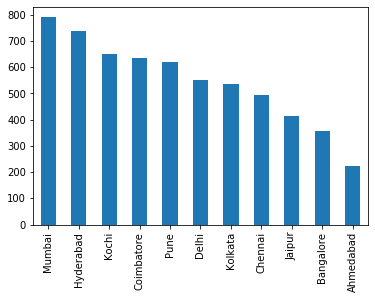

In [48]:
Train['Location'].value_counts().plot.bar()

In [49]:
Train.Price.sort_values(ascending=False)

5919    100.00
1505     97.07
1974     93.67
1984     93.00
4691     90.00
         ...  
3228      0.50
3138      0.45
1628      0.45
2847      0.45
1713      0.44
Name: Price, Length: 6015, dtype: float64

In [50]:
Train.Price.mean()

9.425423108894414

In [51]:
Train[Train.Price>9.47]

Name    Location  Year  \
1        Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
4         Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
7       Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
10                       Maruti Ciaz Zeta       Kochi  2018   
13       Land Rover Range Rover 2.2L Pure       Delhi  2014   
...                                   ...         ...   ...   
6001            Audi A6 2011-2015 2.0 TDI       Kochi  2013   
6006     Mercedes-Benz M-Class ML 320 CDI      Mumbai  2009   
6008              Porsche Panamera Diesel   Hyderabad  2013   
6009                  Toyota Camry Hybrid      Mumbai  2015   
6012  Toyota Innova 2.5 V Diesel 7-seater  Coimbatore  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
1                 41000    Diesel       Manual      First    19.67  1582    
4                 40670    Diesel    Automatic     Second    15.20  1968    
7                 36000    Diesel    Automatic      First    11.36  2755    
10                25692    Petrol       Manual      First    21.56  1462    
13                72000    Diesel    Automatic      First    12.70  2179    
...                 ...       ...          ...        ...      ...    ...   
6001              91903    Diesel    Automatic      First    17.68  1968    
6006             102002    Diesel    Automatic      First     8.70  2987    
6008              40000    Diesel    Automatic     Second    17.85  2967    
6009              33500    Petrol    Automatic      First    19.16  2494    
6012              45004    Diesel       Manual      First    12.80  2494    

       Power  Seats  Price  Mileage_per_kg  Mileage_per_l          Brand  \
1     126.20    5.0  12.50             0.0          19.67        Hyundai   
4     140.80    5.0  17.74             0.0          15.20           Audi   
7     171.50    8.0  17.50             0.0          11.36         Toyota   
10    103.25    5.0   9.95             0.0          21.56         Maruti   
13    187.70    5.0  27.00             0.0          12.70           Land   
...      ...    ...    ...             ...            ...            ...   
6001  174.33    5.0  17.56             0.0          17.68           Audi   
6006  224.34    5.0  10.75             0.0           8.70  Mercedes-Benz   
6008  300.00    4.0  45.00             0.0          17.85        Porsche   
6009  158.20    5.0  19.75             0.0          19.16         Toyota   
6012  102.00    7.0   9.48             0.0          12.80         Toyota   

         Model                  Version  Age  
1        Creta       1.6 CRDi SX Option    5  
4           A4  New 2.0 TDI Multitronic    7  
7       Innova      Crysta 2.8 GX AT 8S    4  
10        Ciaz                     Zeta    2  
13       Rover    Range Rover 2.2L Pure    6  
...        ...                      ...  ...  
6001        A6        2011-2015 2.0 TDI    7  
6006   M-Class               ML 320 CDI   11  
6008  Panamera                   Diesel    7  
6009     Camry                   Hybrid    5  
6012    Innova    2.5 V Diesel 7-seater    9  

[1585 rows x 18 columns]

In [52]:
Train.Mileage.sort_values()

3061     0.00
67       0.00
5022     0.00
307      0.00
1460     0.00
        ...  
4141    33.54
2059    33.54
3129    33.54
2371    33.54
1332    33.54
Name: Mileage, Length: 6015, dtype: float64

In [53]:
pd.crosstab(Train.Location, Train.Owner_Type)

Owner_Type  First  Fourth & Above  Second  Third
Location                                        
Ahmedabad     186               0      38      0
Bangalore     231               1     114     12
Chennai       334               2     121     36
Coimbatore    571               1      63      1
Delhi         457               0      94      2
Hyderabad     656               0      84      0
Jaipur        300               1      97     15
Kochi         614               0      34      3
Kolkata       503               0      32      0
Mumbai        653               2     121     14
Pune          421               2     170     29

In [54]:
Train['Location'].value_counts(normalize=True)

Mumbai        0.131338
Hyderabad     0.123026
Kochi         0.108229
Coimbatore    0.105736
Pune          0.103408
Delhi         0.091937
Kolkata       0.088944
Chennai       0.081962
Jaipur        0.068662
Bangalore     0.059518
Ahmedabad     0.037240
Name: Location, dtype: float64

##### Plots

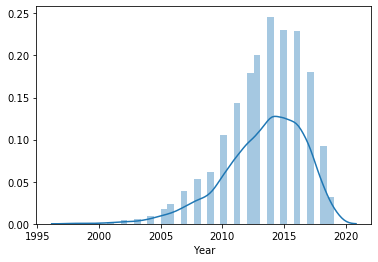

In [55]:
sns.distplot(Train["Year"])

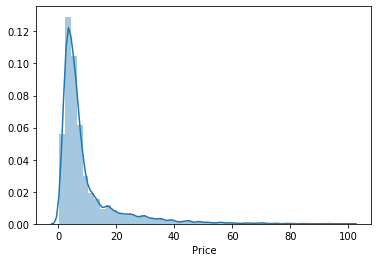

In [56]:
sns.distplot(Train["Price"])

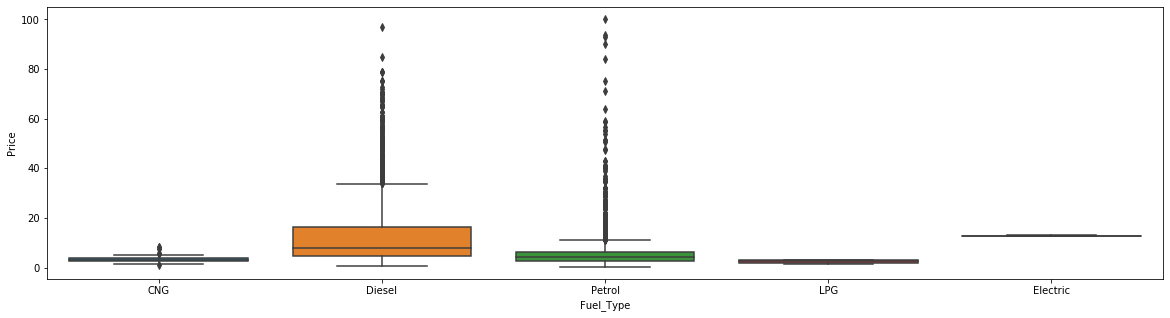

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=Train,
    x='Fuel_Type',y='Price',
    )


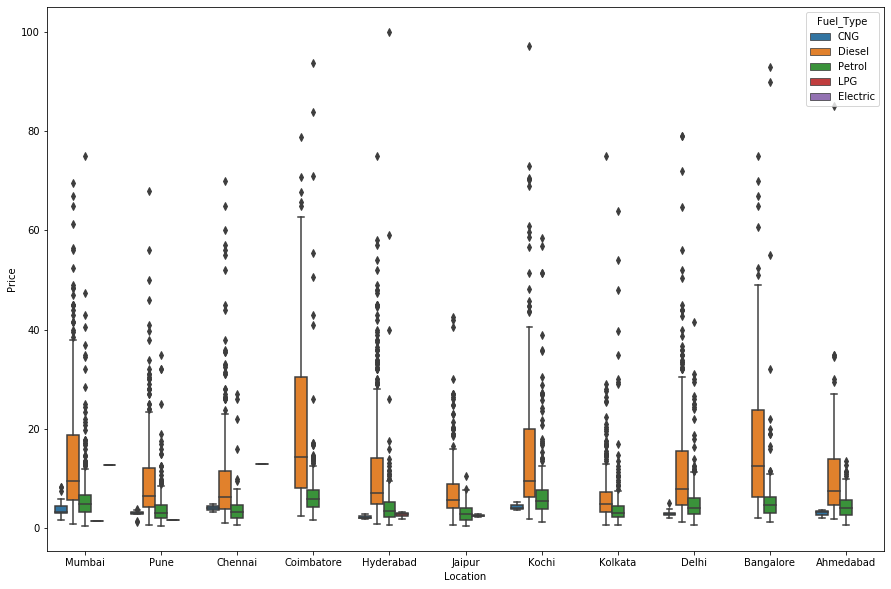

In [58]:
#Price of car vs Locations
plt.figure(figsize=(15,10))
sns.boxplot(x=Train['Location'],y=Train['Price'],data=Train,hue=Train['Fuel_Type'])

Text(0, 0.5, 'Count of cars')

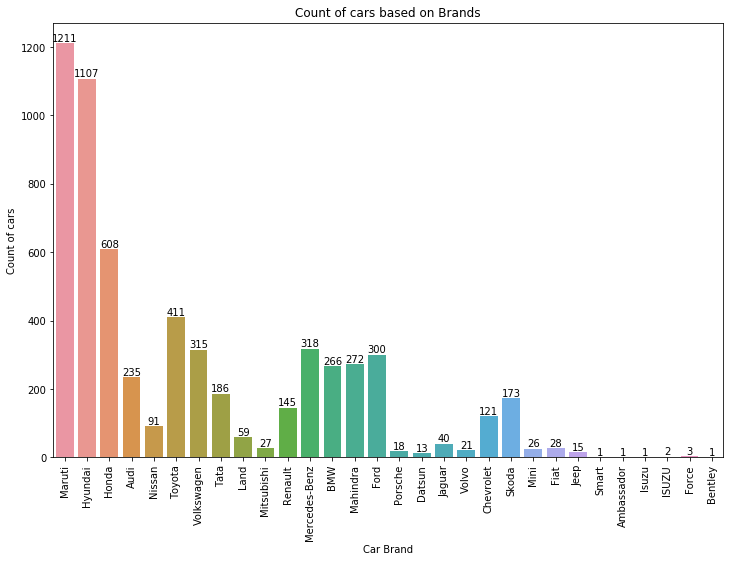

In [59]:
#No. of cars from different Brands
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = Train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brands")
plt.xlabel("Car Brand")
plt.ylabel("Count of cars")

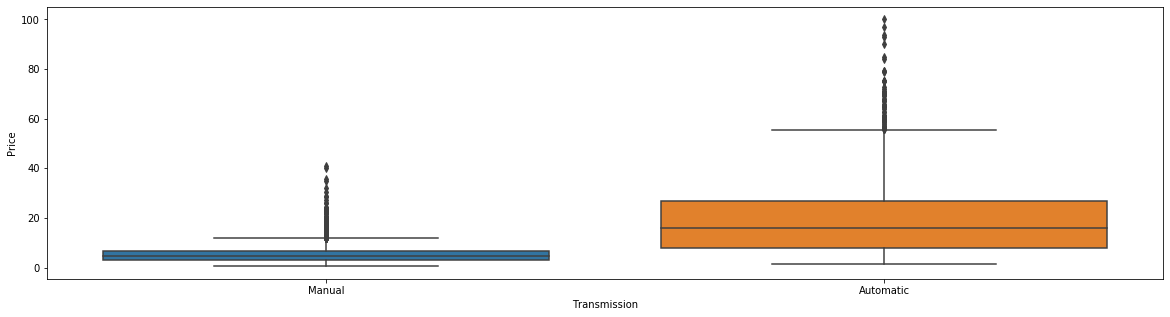

In [60]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=Train,
    x='Transmission',y='Price',
   )


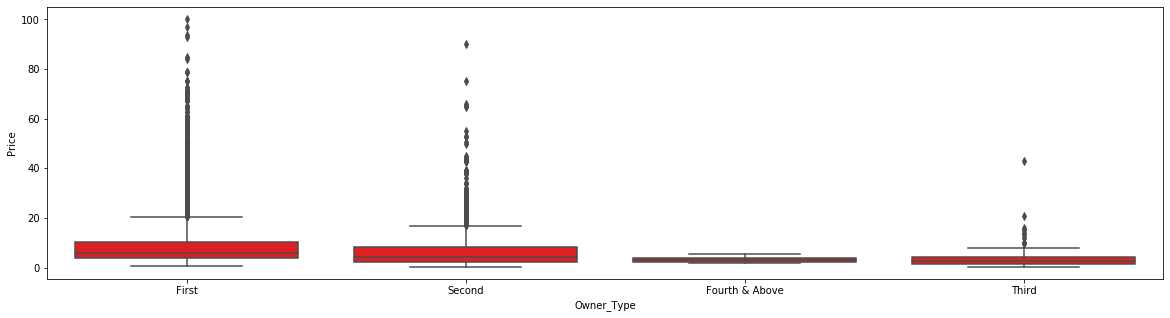

In [61]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=Train,
    x='Owner_Type',y='Price',
    color='red')


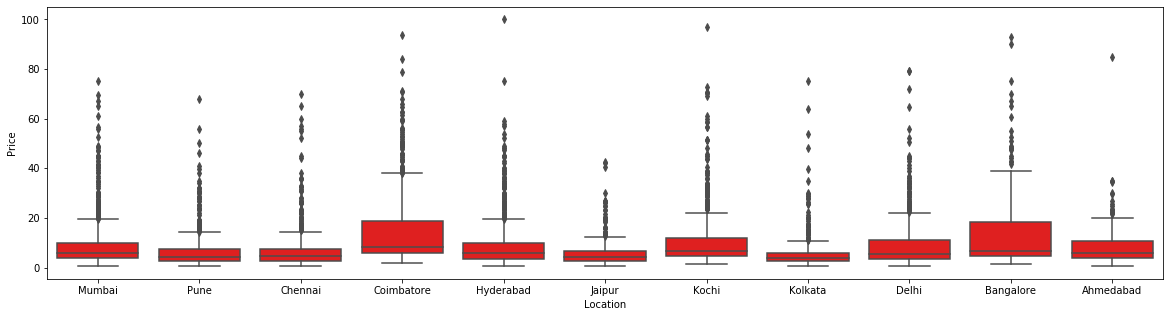

In [62]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=Train,
    x='Location',y='Price',
    color='red')


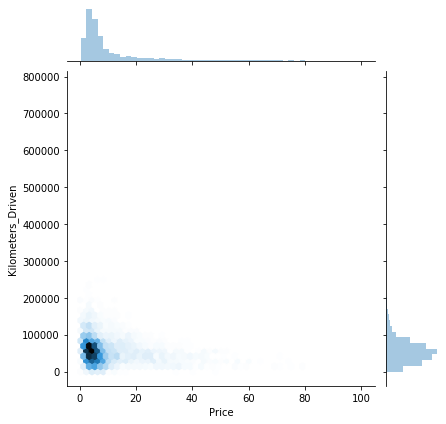

In [63]:
sns.jointplot(x='Price',y='Kilometers_Driven',data=Train,kind='hex')

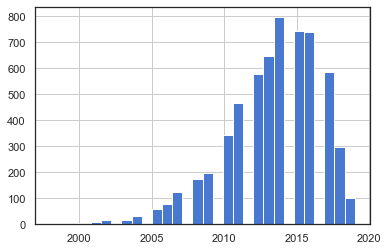

In [64]:
sns.set(style="white", palette="muted", color_codes=True)
Train['Year'].hist(bins=30)

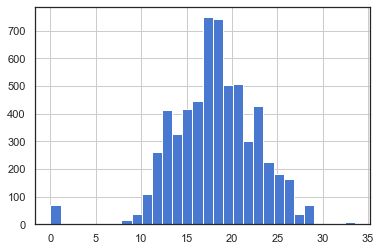

In [65]:
Train['Mileage'].hist(bins=30)  

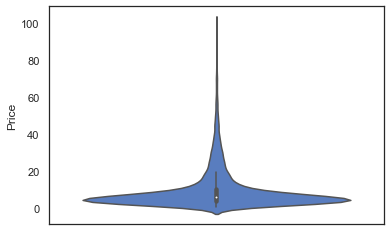

In [66]:
sns.violinplot(y='Price',data=Train)

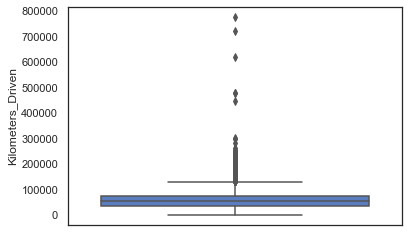

In [67]:
sns.boxplot(y='Kilometers_Driven',data=Train)

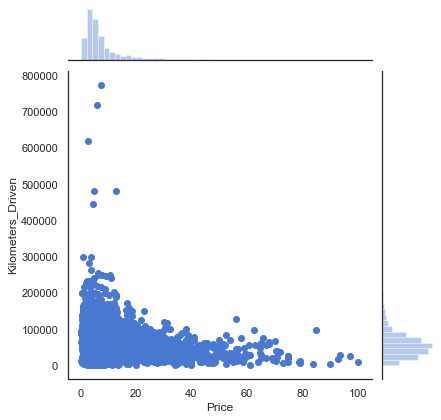

In [68]:
sns.jointplot(x='Price',y='Kilometers_Driven',data=Train)

In [69]:
print("Minimum year in the data is:",Train.Year.min())
print("Maximum year in the data is:",Train.Year.max())
print("Range of year is from {} to {},value is{}".format(Train.Year.max(),Train.Year.min(),Train.Year.max()-Train.Year.min()))
print("Default bin is 50,so each bar corresponds to the value of:",(Train.Year.max()-Train.Year.min())/50)

Minimum year in the data is: 1998
Maximum year in the data is: 2019
Range of year is from 2019 to 1998,value is21
Default bin is 50,so each bar corresponds to the value of: 0.42


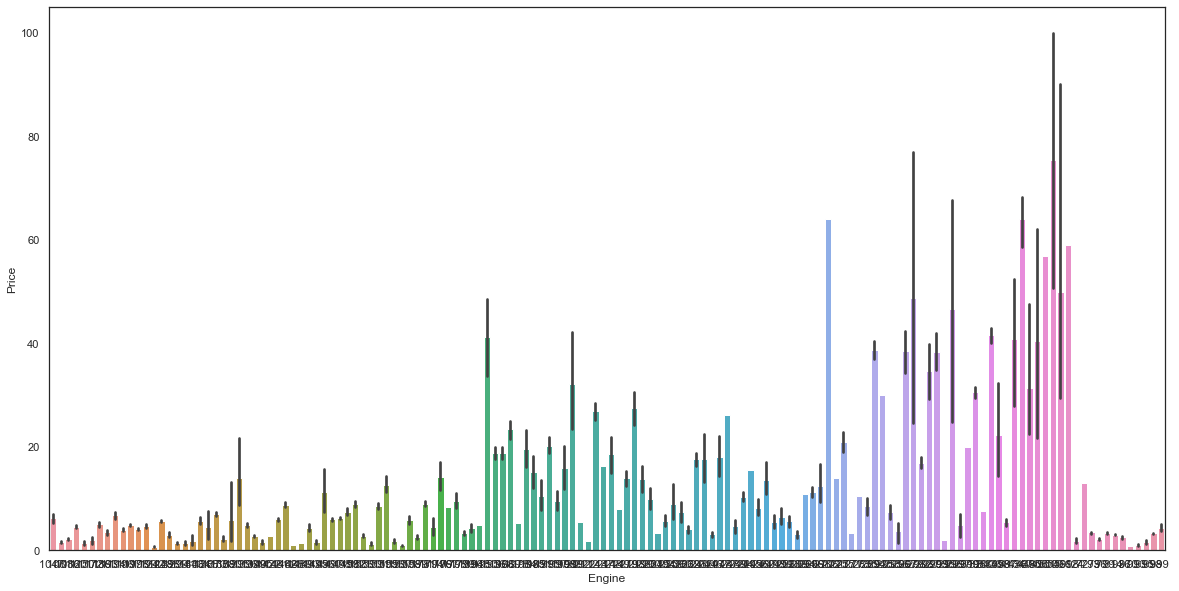

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(x="Engine",y="Price",data=Train)

(0, 350000)

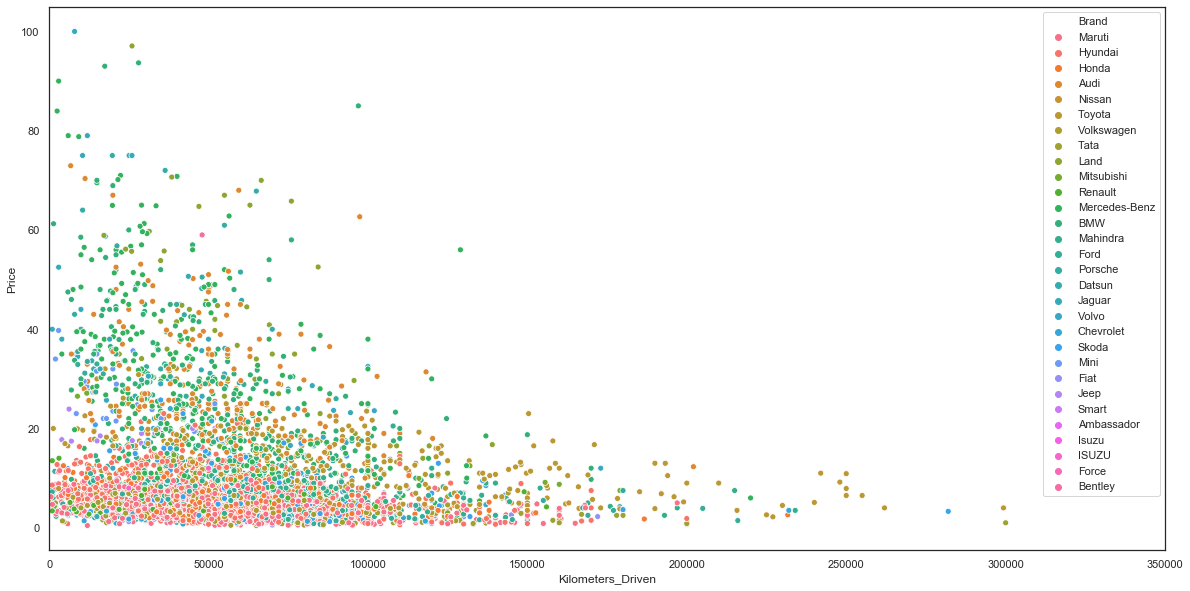

In [71]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Kilometers_Driven',y='Price',data=Train, hue='Brand')
plt.xlim(0, 350000)


(0, 350000)

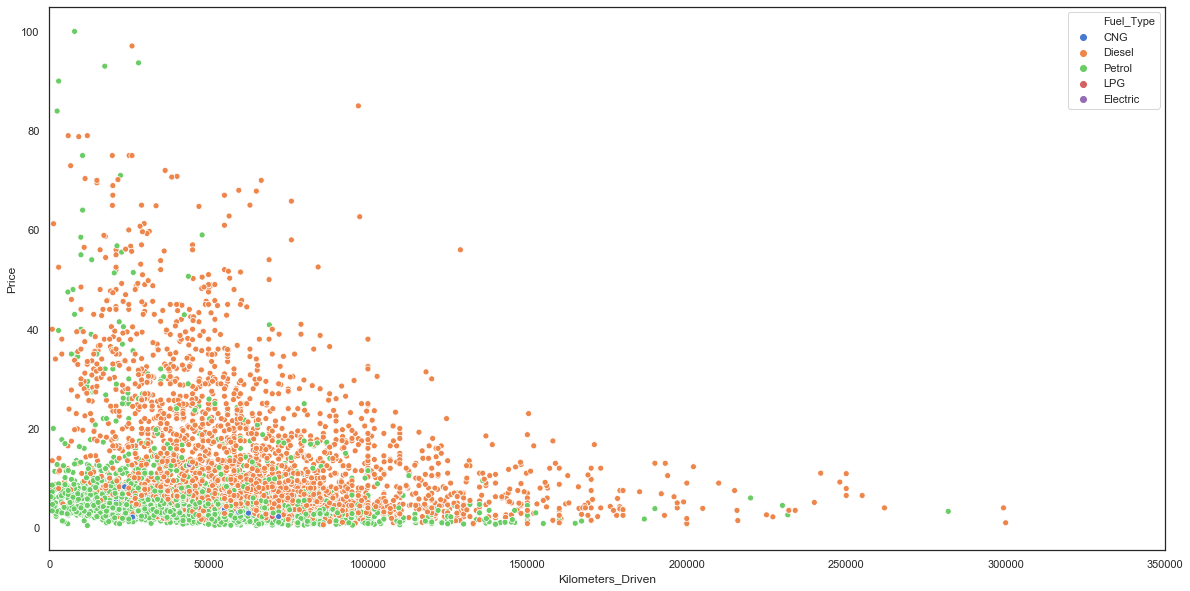

In [72]:
 plt.figure(figsize=(20,10))
sns.scatterplot(x='Kilometers_Driven',y='Price',data=Train, hue='Fuel_Type')
plt.xlim(0, 350000)

(0, 350000)

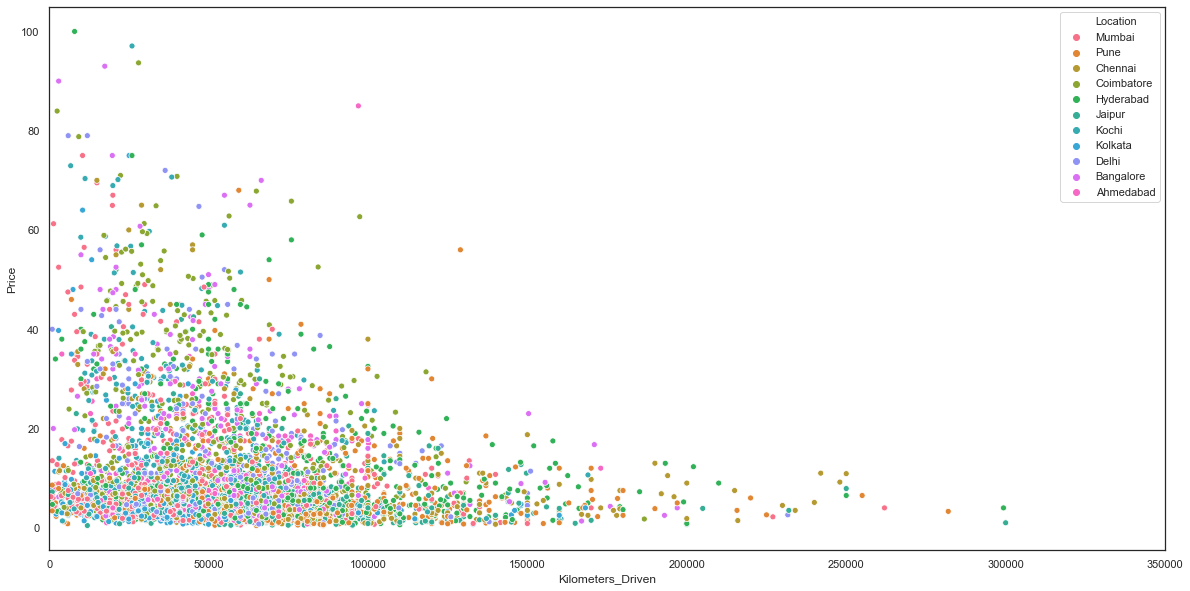

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Kilometers_Driven',y='Price',data=Train, hue='Location')
plt.xlim(0, 350000)

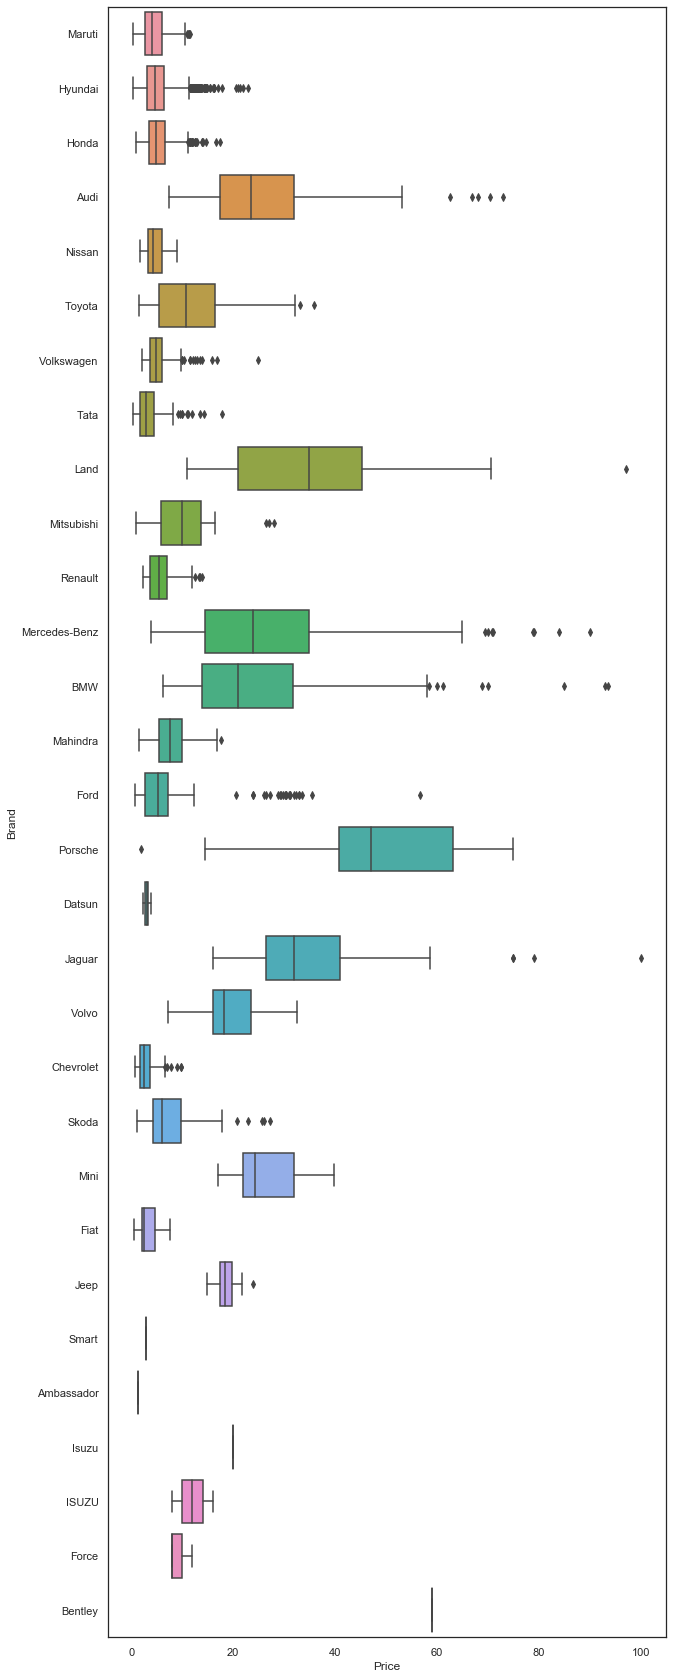

In [74]:
plt.figure(figsize=(10,30))
sns.boxplot(
    data=Train,
    x='Price',y='Brand')


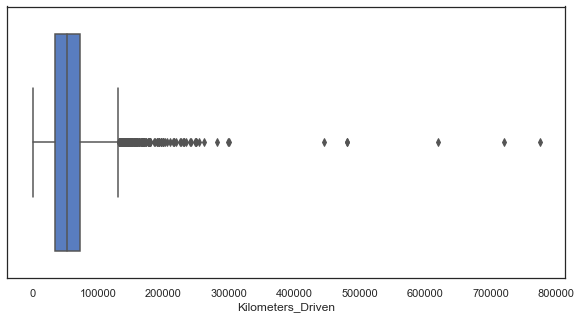

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=Train,
    x='Kilometers_Driven')

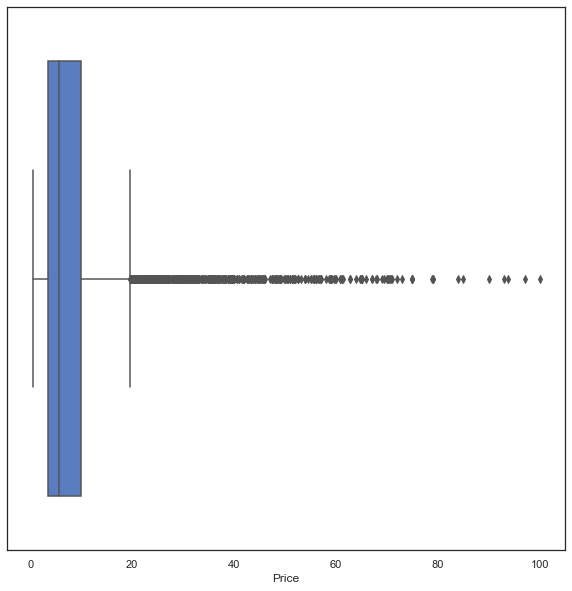

In [76]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=Train,
    x='Price')

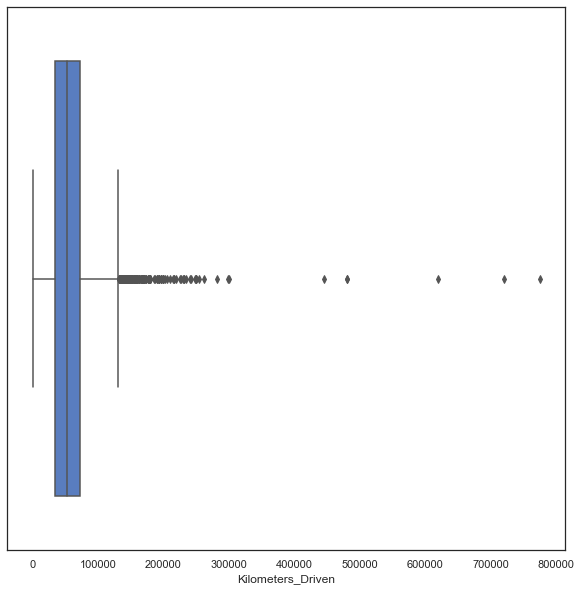

In [77]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=Train,
    x='Kilometers_Driven')

In [78]:
pd.crosstab(Train.Name,Train.Location)

Location                        Ahmedabad  Bangalore  Chennai  Coimbatore  \
Name                                                                        
Ambassador Classic Nova Diesel          0          0        1           0   
Audi A3 35 TDI Attraction               0          0        1           0   
Audi A3 35 TDI Premium                  0          0        0           0   
Audi A3 35 TDI Premium Plus             0          0        0           0   
Audi A3 35 TDI Technology               0          0        0           0   
...                                   ...        ...      ...         ...   
Volvo XC60 D4 Summum                    0          0        0           0   
Volvo XC60 D5                           1          0        0           0   
Volvo XC60 D5 Inscription               0          0        0           0   
Volvo XC90 2007-2015 D5 AT AWD          0          0        0           0   
Volvo XC90 2007-2015 D5 AWD             0          0        0           0   

Location                        Delhi  Hyderabad  Jaipur  Kochi  Kolkata  \
Name                                                                       
Ambassador Classic Nova Diesel      0          0       0      0        0   
Audi A3 35 TDI Attraction           0          0       0      0        0   
Audi A3 35 TDI Premium              0          0       0      0        0   
Audi A3 35 TDI Premium Plus         0          0       0      0        0   
Audi A3 35 TDI Technology           1          0       0      0        0   
...                               ...        ...     ...    ...      ...   
Volvo XC60 D4 Summum                0          1       0      0        0   
Volvo XC60 D5                       0          1       0      0        0   
Volvo XC60 D5 Inscription           0          0       0      1        0   
Volvo XC90 2007-2015 D5 AT AWD      0          0       0      1        0   
Volvo XC90 2007-2015 D5 AWD         0          0       0      1        0   

Location                        Mumbai  Pune  
Name                                          
Ambassador Classic Nova Diesel       0     0  
Audi A3 35 TDI Attraction            0     0  
Audi A3 35 TDI Premium               1     0  
Audi A3 35 TDI Premium Plus          1     0  
Audi A3 35 TDI Technology            0     0  
...                                ...   ...  
Volvo XC60 D4 Summum                 0     0  
Volvo XC60 D5                        0     1  
Volvo XC60 D5 Inscription            0     0  
Volvo XC90 2007-2015 D5 AT AWD       0     0  
Volvo XC90 2007-2015 D5 AWD          0     0  

[1873 rows x 11 columns]

In [79]:
pd.crosstab(Train.Name,Train.Fuel_Type)

Fuel_Type                       CNG  Diesel  Electric  LPG  Petrol
Name                                                              
Ambassador Classic Nova Diesel    0       1         0    0       0
Audi A3 35 TDI Attraction         0       1         0    0       0
Audi A3 35 TDI Premium            0       1         0    0       0
Audi A3 35 TDI Premium Plus       0       1         0    0       0
Audi A3 35 TDI Technology         0       1         0    0       0
...                             ...     ...       ...  ...     ...
Volvo XC60 D4 Summum              0       1         0    0       0
Volvo XC60 D5                     0       3         0    0       0
Volvo XC60 D5 Inscription         0       1         0    0       0
Volvo XC90 2007-2015 D5 AT AWD    0       1         0    0       0
Volvo XC90 2007-2015 D5 AWD       0       1         0    0       0

[1873 rows x 5 columns]

In [80]:
pd.crosstab(Train.Name, Train.Owner_Type)

Owner_Type                      First  Fourth & Above  Second  Third
Name                                                                
Ambassador Classic Nova Diesel      0               0       0      1
Audi A3 35 TDI Attraction           1               0       0      0
Audi A3 35 TDI Premium              1               0       0      0
Audi A3 35 TDI Premium Plus         1               0       0      0
Audi A3 35 TDI Technology           0               0       1      0
...                               ...             ...     ...    ...
Volvo XC60 D4 Summum                0               0       1      0
Volvo XC60 D5                       3               0       0      0
Volvo XC60 D5 Inscription           1               0       0      0
Volvo XC90 2007-2015 D5 AT AWD      1               0       0      0
Volvo XC90 2007-2015 D5 AWD         1               0       0      0

[1873 rows x 4 columns]

#### Scaling Data

In [81]:
Train.Kilometers_Driven=(Train.Kilometers_Driven-Train.Kilometers_Driven.min())/(Train.Kilometers_Driven.max()-Train.Kilometers_Driven.min())
Train.Kilometers_Driven

0       0.092703
1       0.052694
2       0.059147
3       0.112062
4       0.052268
          ...   
6014    0.035097
6015    0.128840
6016    0.070763
6017    0.059147
6018    0.060438
Name: Kilometers_Driven, Length: 6015, dtype: float64

In [82]:
Test.Kilometers_Driven=(Test.Kilometers_Driven-Test.Kilometers_Driven.min())/(Test.Kilometers_Driven.max()-Test.Kilometers_Driven.min())
Test.Kilometers_Driven

0       0.114410
1       0.153275
2       0.094556
3       0.395415
4       0.080229
          ...   
1229    0.253327
1230    0.166189
1231    0.077364
1232    0.146883
1233    0.204708
Name: Kilometers_Driven, Length: 1234, dtype: float64

In [83]:
scaler = MinMaxScaler()
num_vars = ['Mileage', 'Power', 'Engine','Mileage_per_kg','Mileage_per_l']
Train[num_vars] = scaler.fit_transform(Train[num_vars])
Train

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010           0.092703   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015           0.052694   
2                         Honda Jazz V     Chennai  2011           0.059147   
3                    Maruti Ertiga VDI     Chennai  2012           0.112062   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013           0.052268   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014           0.035097   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015           0.128840   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012           0.070763   
6017                Maruti Wagon R VXI     Kolkata  2013           0.059147   
6018             Chevrolet Beat Diesel   Hyderabad  2011           0.060438   

     Fuel_Type Transmission Owner_Type   Mileage    Engine     Power  Seats  \
0          CNG       Manual      First  0.793083  0.156261  0.105362    5.0   
1       Diesel       Manual      First  0.586464  0.254809  0.228623    5.0   
2       Petrol       Manual      First  0.542636  0.190179  0.160688    5.0   
3       Diesel       Manual      First  0.619261  0.198448  0.160797    7.0   
4       Diesel    Automatic     Second  0.453190  0.319946  0.255072    5.0   
...        ...          ...        ...       ...       ...       ...    ...   
6014    Diesel       Manual      First  0.846750  0.198448  0.134058    5.0   
6015    Diesel       Manual      First  0.727490  0.176848  0.128623    5.0   
6016    Diesel       Manual     Second  0.417412  0.409382  0.202899    8.0   
6017    Petrol       Manual      First  0.563506  0.156261  0.121558    5.0   
6018    Diesel       Manual      First  0.758497  0.145798  0.104348    5.0   

      Price  Mileage_per_kg  Mileage_per_l      Brand   Model  \
0      1.75        0.793083       0.000000     Maruti   Wagon   
1     12.50        0.000000       0.692606    Hyundai   Creta   
2      4.50        0.000000       0.640845      Honda    Jazz   
3      6.00        0.000000       0.731338     Maruti  Ertiga   
4     17.74        0.000000       0.535211       Audi      A4   
...     ...             ...            ...        ...     ...   
6014   4.75        0.000000       1.000000     Maruti   Swift   
6015   4.00        0.000000       0.859155    Hyundai   Xcent   
6016   2.90        0.000000       0.492958   Mahindra    Xylo   
6017   2.65        0.000000       0.665493     Maruti   Wagon   
6018   2.50        0.000000       0.895775  Chevrolet    Beat   

                      Version  Age  
0                   R LXI CNG   10  
1          1.6 CRDi SX Option    5  
2                           V    9  
3                         VDI    8  
4     New 2.0 TDI Multitronic    7  
...                       ...  ...  
6014                      VDI    6  
6015               1.1 CRDi S    5  
6016                  D4 BSIV    8  
6017                    R VXI    7  
6018                   Diesel    9  

[6015 rows x 18 columns]

In [84]:
scaler = MinMaxScaler()
num_vars = ['Mileage', 'Power', 'Engine','Mileage_per_kg','Mileage_per_l']
Test[num_vars] = scaler.fit_transform(Test[num_vars])
Test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type   Mileage    Engine  \
0              0.114410       CNG       Manual      First  1.000000  0.069594   
1              0.153275    Petrol       Manual     Second  0.765654  0.032006   
2              0.094556    Diesel       Manual      First  0.424055  0.329178   
3              0.395415    Diesel       Manual      First  0.731246  0.137700   
4              0.080229    Petrol       Manual      First  0.573466  0.106624   
...                 ...       ...          ...        ...       ...       ...   
1229           0.253327    Diesel       Manual      First  0.636702  0.181243   
1230           0.166189    Petrol    Automatic      First  0.533478  0.106624   
1231           0.077364    Diesel       Manual      First  0.715437  0.155750   
1232           0.146883    Petrol    Automatic      Third  0.533168  0.106624   
1233           0.204708    Diesel    Automatic      First  0.309981  0.283588   

         Power  Seats  Mileage_per_kg  Mileage_per_l          Brand    Model  \
0     0.094481    4.0             1.0       0.000000         Maruti     Alto   
1     0.076786    5.0             0.0       0.869718         Maruti     Alto   
2     0.239935    7.0             0.0       0.481690         Toyota   Innova   
3     0.000000    5.0             0.0       0.830634         Toyota    Etios   
4     0.134497    5.0             0.0       0.651408        Hyundai      i20   
...        ...    ...             ...            ...            ...      ...   
1229  0.168182    5.0             0.0       0.723239     Volkswagen    Vento   
1230  0.168182    5.0             0.0       0.605986     Volkswagen     Polo   
1231  0.102435    5.0             0.0       0.812676         Nissan    Micra   
1232  0.168182    5.0             0.0       0.605634     Volkswagen     Polo   
1233  0.275974    5.0             0.0       0.352113  Mercedes-Benz  E-Class   

                             Version  Age  
0                        K10 LXI CNG    6  
1                  800 2016-2019 LXI    7  
2        Crysta Touring Sport 2.4 MT    3  
3                            Liva GD    8  
4                              Magna    6  
...                              ...  ...  
1229                Diesel Trendline    9  
1230                          GT TSI    5  
1231                       Diesel XV    8  
1232                          GT TSI    7  
1233  2009-2013 E 220 CDI Avantgarde    6  

[1234 rows x 17 columns]

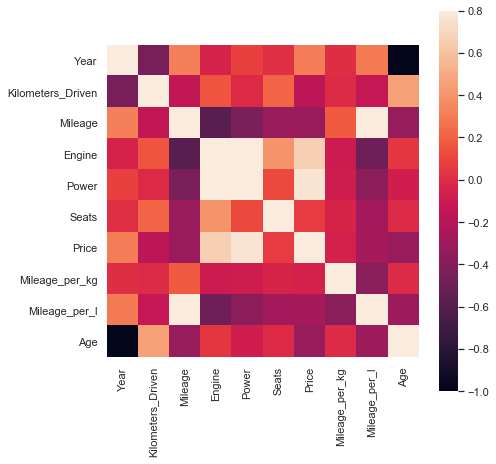

In [85]:
corrmat = Train.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);


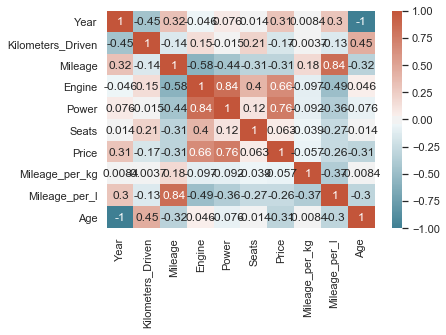

In [86]:
corr = Train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

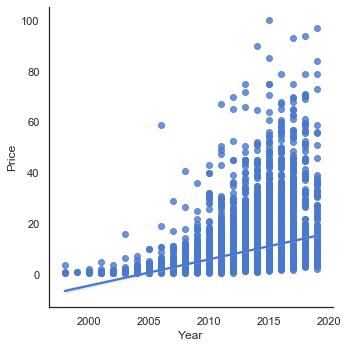

In [87]:
sns.lmplot(x='Year', y='Price', data=Train)

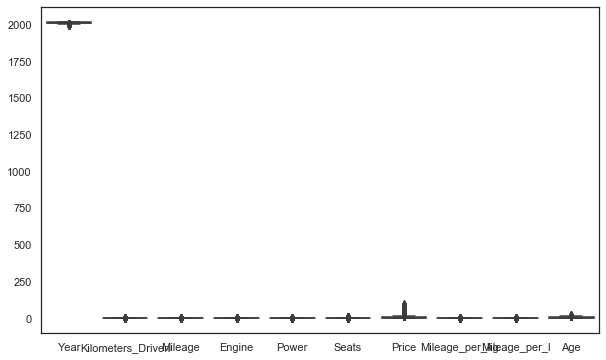

In [88]:

plt.figure(figsize = (10, 6))
sns.boxplot(data=Train)

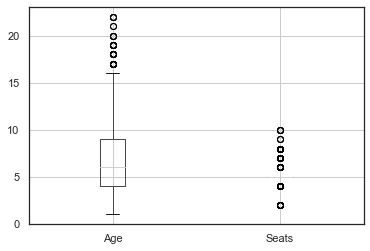

In [89]:
Train.boxplot(column=["Age","Seats"])

In [90]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   float64
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
 11  Mileage_per_kg     1234 non-null   float64
 12  Mileage_per_l      1234 non-null   float64
 13  Brand              1234 non-null   object 
 14  Model              1234 non-null   object 
 15  Version            1234 non-null   object 
 16  Age                1234 

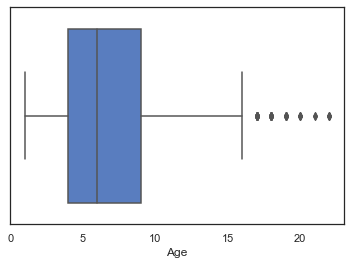

In [91]:
sns.boxplot(x=Train['Age'],)

In [92]:
Train[Train['Seats'].isnull()]


Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price, Mileage_per_kg, Mileage_per_l, Brand, Model, Version, Age]
Index: []

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

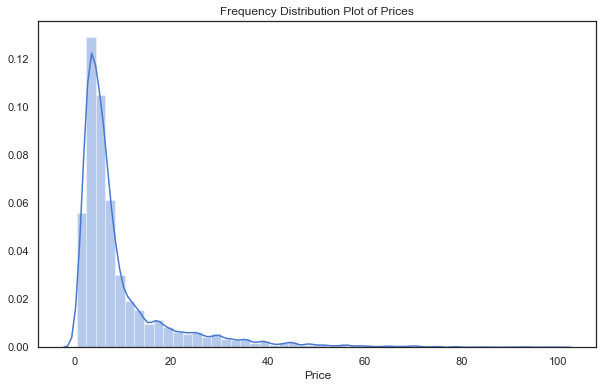

In [93]:
x = Train['Price']
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

In [94]:
print(Train['Price'].mean())
print(Train['Price'].median())
print(Train['Price'].mode())

9.425423108894414
5.63
0    4.5
dtype: float64


Reggression


Text(0.5, 1.0, 'Age vs Price')

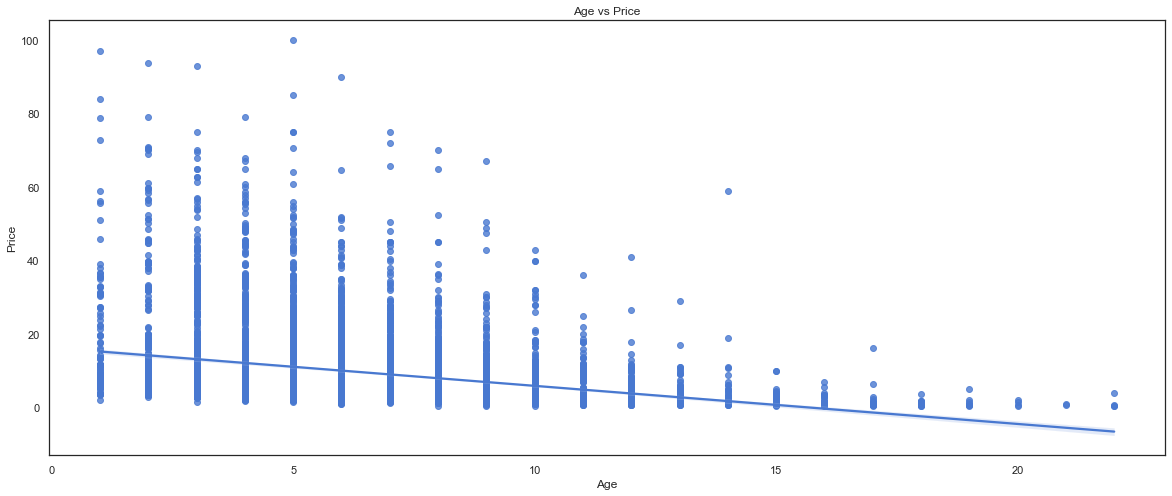

In [95]:
plt.figure(figsize=(20,8))
sns.regplot(x='Age', y='Price',data=Train).set_title('Age vs Price')

Text(0.5, 1.0, 'Km vs Price')

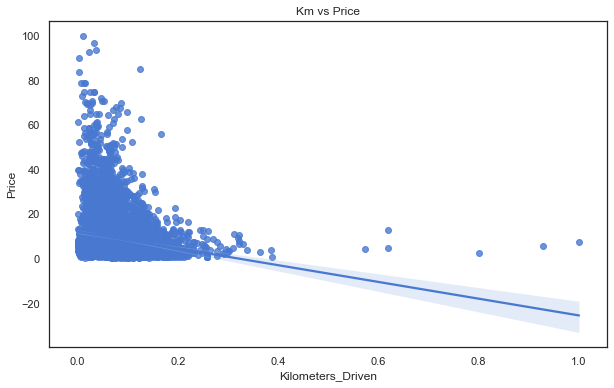

In [96]:
Train = Train[Train.Kilometers_Driven < 400000]
plt.figure(figsize=(10,6))
sns.regplot(x='Kilometers_Driven', y='Price', data=Train).set_title('Km vs Price')


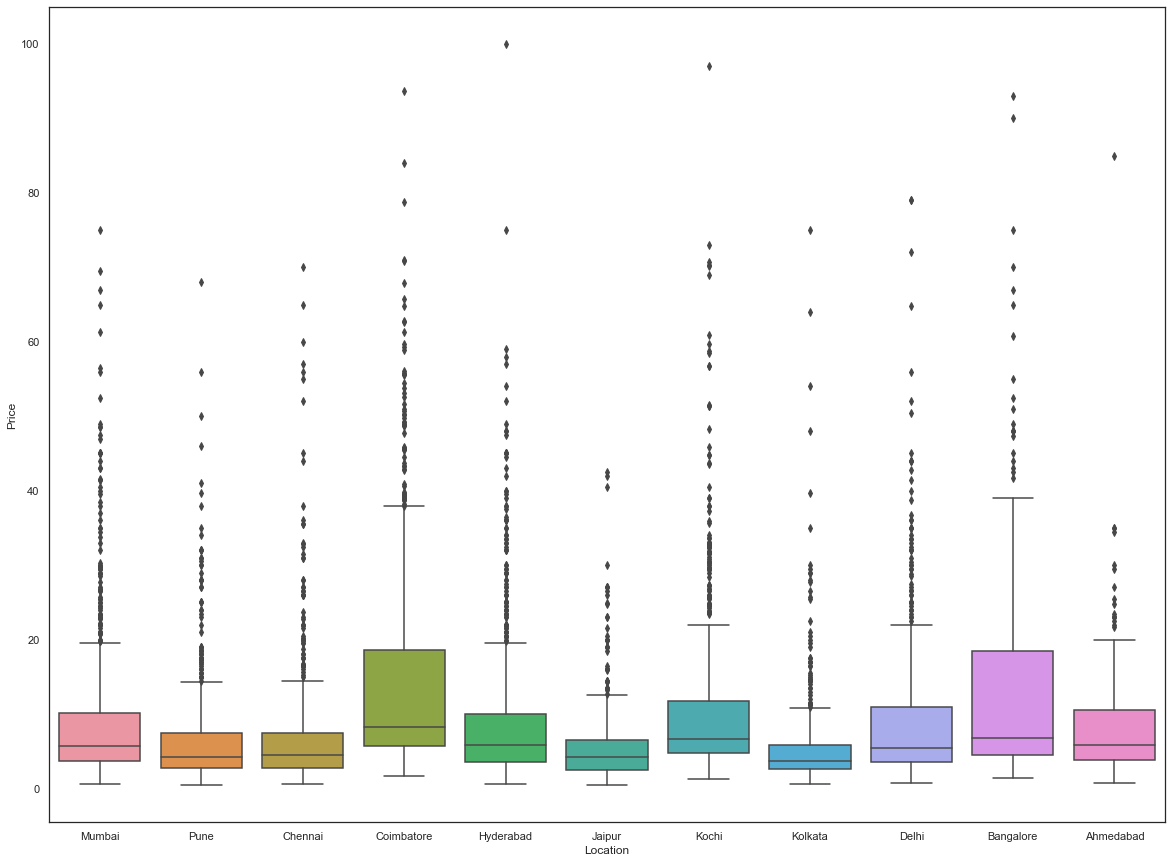

In [97]:
plt.figure(figsize=(20,15))
sns.boxplot(data=Train, x='Location',y='Price')

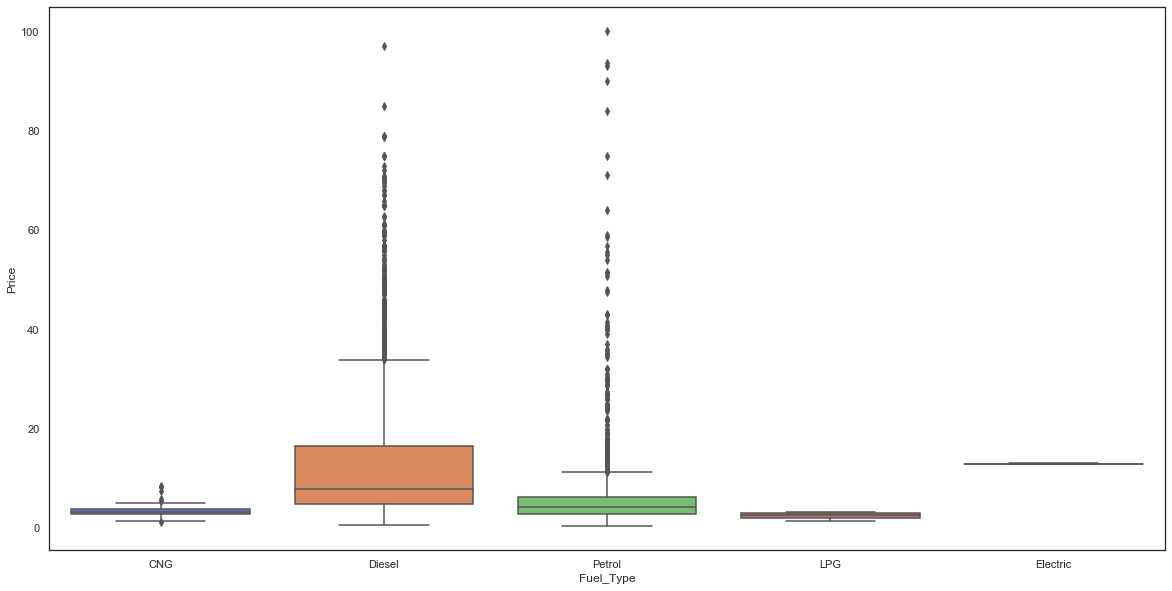

In [98]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Train,x='Fuel_Type',y='Price')

Text(0.5, 1.0, 'Seats distribution')

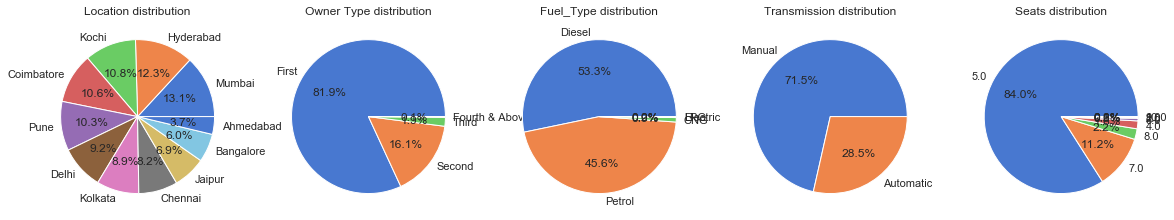

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
x=Train['Location'].value_counts().index
y=Train['Location'].value_counts().values
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.title("Location distribution")
plt.subplot(1,5,2)
x=Train['Owner_Type'].value_counts().index
y=Train['Owner_Type'].value_counts().values
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.title("Owner Type distribution")
plt.subplot(1,5,3)
x=Train['Fuel_Type'].value_counts().index
y=Train['Fuel_Type'].value_counts().values
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.title("Fuel_Type distribution")
plt.subplot(1,5,4)
x=Train['Transmission'].value_counts().index
y=Train['Transmission'].value_counts().values
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.title("Transmission distribution")
plt.subplot(1,5,5)
x=Train['Seats'].value_counts().index
y=Train['Seats'].value_counts().values
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.title("Seats distribution")

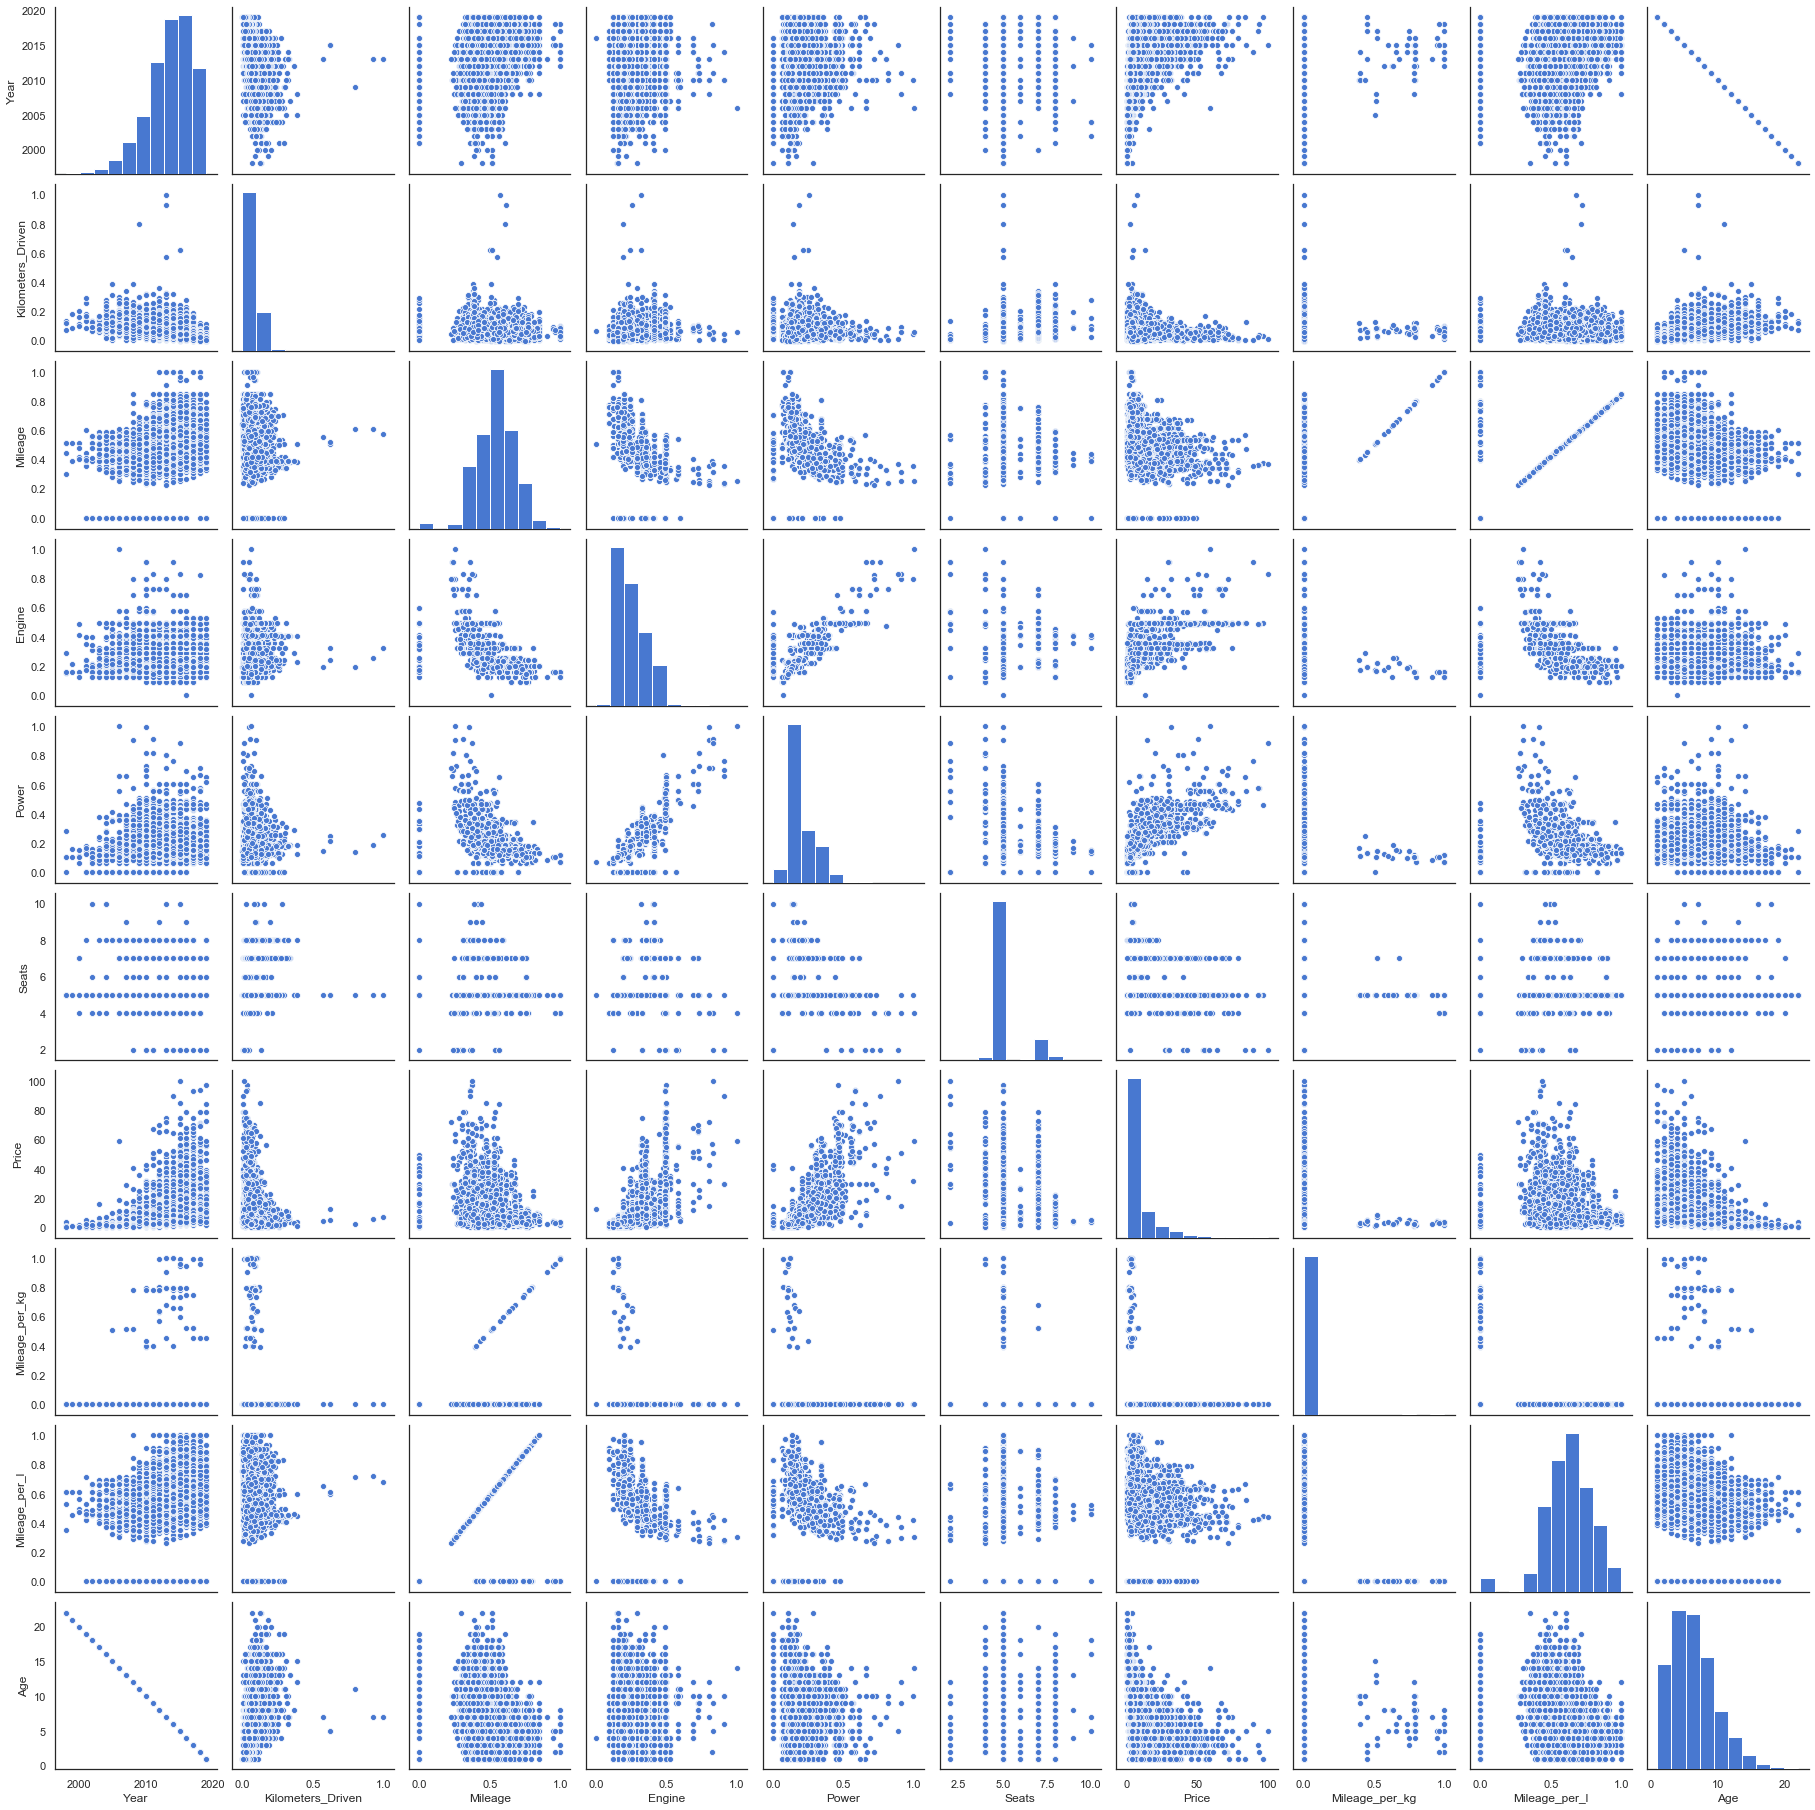

In [100]:
sns.pairplot(Train)

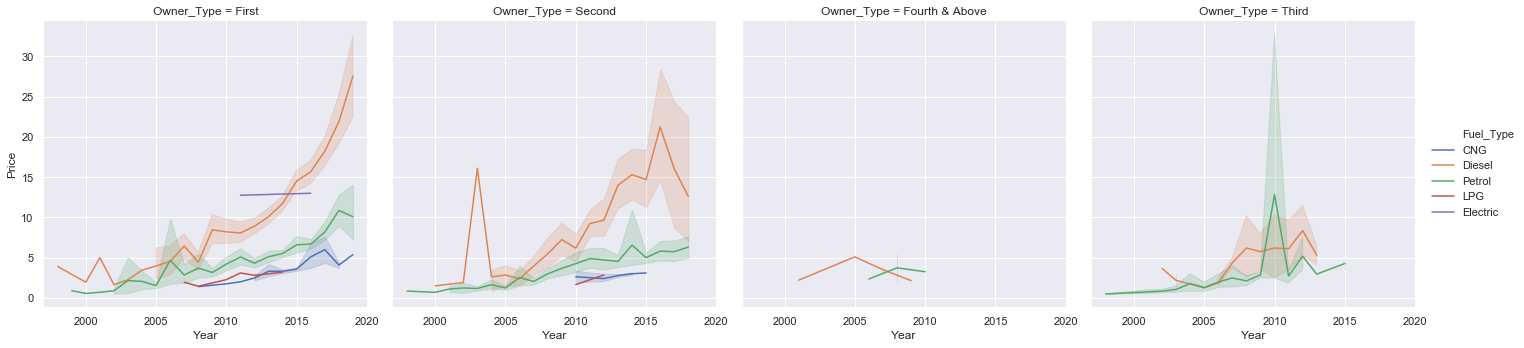

In [101]:
sns.set(font_scale = 1)
sns.relplot(x = "Year" , y = "Price" , data = Train , hue = "Fuel_Type" ,kind ="line", col = "Owner_Type")

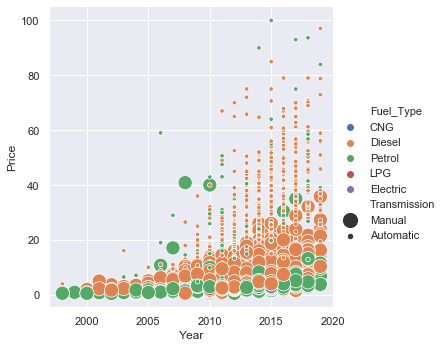

In [102]:
sns.relplot(x = "Year" , y = "Price" , data = Train , hue = "Fuel_Type" , 
            size = "Transmission", sizes=(20,200))

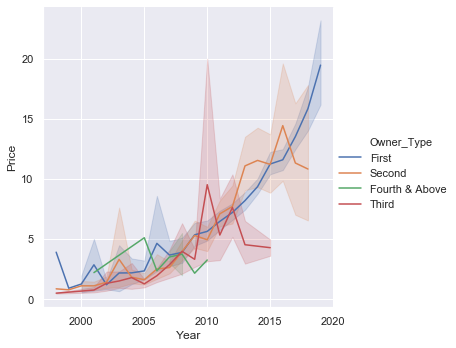

In [103]:
sns.relplot(x = "Year" , y = "Price" , data = Train , hue = "Owner_Type", kind = "line" )

Encoding the categorical variables 

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
New_train=Train.copy()
New_test=Test.copy()
New_train= pd.concat([New_train,pd.get_dummies(New_train['Location'], prefix='Location').astype(float)],axis=1)
New_test= pd.concat([New_test,pd.get_dummies(New_test['Location'], prefix='Location').astype(float)],axis=1)
Train

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010           0.092703   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015           0.052694   
2                         Honda Jazz V     Chennai  2011           0.059147   
3                    Maruti Ertiga VDI     Chennai  2012           0.112062   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013           0.052268   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014           0.035097   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015           0.128840   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012           0.070763   
6017                Maruti Wagon R VXI     Kolkata  2013           0.059147   
6018             Chevrolet Beat Diesel   Hyderabad  2011           0.060438   

     Fuel_Type Transmission Owner_Type   Mileage    Engine     Power  Seats  \
0          CNG       Manual      First  0.793083  0.156261  0.105362    5.0   
1       Diesel       Manual      First  0.586464  0.254809  0.228623    5.0   
2       Petrol       Manual      First  0.542636  0.190179  0.160688    5.0   
3       Diesel       Manual      First  0.619261  0.198448  0.160797    7.0   
4       Diesel    Automatic     Second  0.453190  0.319946  0.255072    5.0   
...        ...          ...        ...       ...       ...       ...    ...   
6014    Diesel       Manual      First  0.846750  0.198448  0.134058    5.0   
6015    Diesel       Manual      First  0.727490  0.176848  0.128623    5.0   
6016    Diesel       Manual     Second  0.417412  0.409382  0.202899    8.0   
6017    Petrol       Manual      First  0.563506  0.156261  0.121558    5.0   
6018    Diesel       Manual      First  0.758497  0.145798  0.104348    5.0   

      Price  Mileage_per_kg  Mileage_per_l      Brand   Model  \
0      1.75        0.793083       0.000000     Maruti   Wagon   
1     12.50        0.000000       0.692606    Hyundai   Creta   
2      4.50        0.000000       0.640845      Honda    Jazz   
3      6.00        0.000000       0.731338     Maruti  Ertiga   
4     17.74        0.000000       0.535211       Audi      A4   
...     ...             ...            ...        ...     ...   
6014   4.75        0.000000       1.000000     Maruti   Swift   
6015   4.00        0.000000       0.859155    Hyundai   Xcent   
6016   2.90        0.000000       0.492958   Mahindra    Xylo   
6017   2.65        0.000000       0.665493     Maruti   Wagon   
6018   2.50        0.000000       0.895775  Chevrolet    Beat   

                      Version  Age  
0                   R LXI CNG   10  
1          1.6 CRDi SX Option    5  
2                           V    9  
3                         VDI    8  
4     New 2.0 TDI Multitronic    7  
...                       ...  ...  
6014                      VDI    6  
6015               1.1 CRDi S    5  
6016                  D4 BSIV    8  
6017                    R VXI    7  
6018                   Diesel    9  

[6015 rows x 18 columns]

In [105]:
New_train= pd.concat([New_train,pd.get_dummies(New_train['Brand'], prefix='Br').astype(float)],axis=1)
New_test= pd.concat([New_test,pd.get_dummies(New_test['Brand'], prefix='Br').astype(float)],axis=1)
Train

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010           0.092703   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015           0.052694   
2                         Honda Jazz V     Chennai  2011           0.059147   
3                    Maruti Ertiga VDI     Chennai  2012           0.112062   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013           0.052268   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014           0.035097   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015           0.128840   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012           0.070763   
6017                Maruti Wagon R VXI     Kolkata  2013           0.059147   
6018             Chevrolet Beat Diesel   Hyderabad  2011           0.060438   

     Fuel_Type Transmission Owner_Type   Mileage    Engine     Power  Seats  \
0          CNG       Manual      First  0.793083  0.156261  0.105362    5.0   
1       Diesel       Manual      First  0.586464  0.254809  0.228623    5.0   
2       Petrol       Manual      First  0.542636  0.190179  0.160688    5.0   
3       Diesel       Manual      First  0.619261  0.198448  0.160797    7.0   
4       Diesel    Automatic     Second  0.453190  0.319946  0.255072    5.0   
...        ...          ...        ...       ...       ...       ...    ...   
6014    Diesel       Manual      First  0.846750  0.198448  0.134058    5.0   
6015    Diesel       Manual      First  0.727490  0.176848  0.128623    5.0   
6016    Diesel       Manual     Second  0.417412  0.409382  0.202899    8.0   
6017    Petrol       Manual      First  0.563506  0.156261  0.121558    5.0   
6018    Diesel       Manual      First  0.758497  0.145798  0.104348    5.0   

      Price  Mileage_per_kg  Mileage_per_l      Brand   Model  \
0      1.75        0.793083       0.000000     Maruti   Wagon   
1     12.50        0.000000       0.692606    Hyundai   Creta   
2      4.50        0.000000       0.640845      Honda    Jazz   
3      6.00        0.000000       0.731338     Maruti  Ertiga   
4     17.74        0.000000       0.535211       Audi      A4   
...     ...             ...            ...        ...     ...   
6014   4.75        0.000000       1.000000     Maruti   Swift   
6015   4.00        0.000000       0.859155    Hyundai   Xcent   
6016   2.90        0.000000       0.492958   Mahindra    Xylo   
6017   2.65        0.000000       0.665493     Maruti   Wagon   
6018   2.50        0.000000       0.895775  Chevrolet    Beat   

                      Version  Age  
0                   R LXI CNG   10  
1          1.6 CRDi SX Option    5  
2                           V    9  
3                         VDI    8  
4     New 2.0 TDI Multitronic    7  
...                       ...  ...  
6014                      VDI    6  
6015               1.1 CRDi S    5  
6016                  D4 BSIV    8  
6017                    R VXI    7  
6018                   Diesel    9  

[6015 rows x 18 columns]

In [106]:
lben = LabelEncoder()

New_train['Fuel_Type'] = lben.fit_transform(New_train['Fuel_Type']).astype(float)
New_train['Owner_Type'] = lben.fit_transform(New_train['Owner_Type']).astype(float)
New_train['Transmission'] = lben.fit_transform(New_train['Transmission']).astype(float)

In [107]:
lben = LabelEncoder()

New_test['Fuel_Type'] = lben.fit_transform(New_test['Fuel_Type']).astype(float)
New_test['Owner_Type'] = lben.fit_transform(New_test['Owner_Type']).astype(float)
New_test['Transmission'] = lben.fit_transform(New_test['Transmission']).astype(float)
New_test

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type   Mileage  \
0              0.114410        0.0           1.0         0.0  1.000000   
1              0.153275        3.0           1.0         2.0  0.765654   
2              0.094556        1.0           1.0         0.0  0.424055   
3              0.395415        1.0           1.0         0.0  0.731246   
4              0.080229        3.0           1.0         0.0  0.573466   
...                 ...        ...           ...         ...       ...   
1229           0.253327        1.0           1.0         0.0  0.636702   
1230           0.166189        3.0           0.0         0.0  0.533478   
1231           0.077364        1.0           1.0         0.0  0.715437   
1232           0.146883        3.0           0.0         3.0  0.533168   
1233           0.204708        1.0           0.0         0.0  0.309981   

        Engine     Power  ...  Br_Mitsubishi  Br_Nissan  Br_OpelCorsa  \
0     0.069594  0.094481  ...            0.0        0.0           0.0   
1     0.032006  0.076786  ...            0.0        0.0           0.0   
2     0.329178  0.239935  ...            0.0        0.0           0.0   
3     0.137700  0.000000  ...            0.0        0.0           0.0   
4     0.106624  0.134497  ...            0.0        0.0           0.0   
...        ...       ...  ...            ...        ...           ...   
1229  0.181243  0.168182  ...            0.0        0.0           0.0   
1230  0.106624  0.168182  ...            0.0        0.0           0.0   
1231  0.155750  0.102435  ...            0.0        1.0           0.0   
1232  0.106624  0.168182  ...            0.0        0.0           0.0   
1233  0.283588  0.275974  ...            0.0        0.0           0.0   

     Br_Porsche Br_Renault Br_Skoda  Br_Tata  Br_Toyota  Br_Volkswagen  \
0           0.0        0.0      0.0      0.0        0.0            0.0   
1           0.0        0.0      0.0      0.0        0.0            0.0   
2           0.0        0.0      0.0      0.0        1.0            0.0   
3           0.0        0.0      0.0      0.0        1.0            0.0   
4           0.0        0.0      0.0      0.0        0.0            0.0   
...         ...        ...      ...      ...        ...            ...   
1229        0.0        0.0      0.0      0.0        0.0            1.0   
1230        0.0        0.0      0.0      0.0        0.0            1.0   
1231        0.0        0.0      0.0      0.0        0.0            0.0   
1232        0.0        0.0      0.0      0.0        0.0            1.0   
1233        0.0        0.0      0.0      0.0        0.0            0.0   

      Br_Volvo  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
1229       0.0  
1230       0.0  
1231       0.0  
1232       0.0  
1233       0.0  

[1234 rows x 57 columns]

In [108]:
New_train

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010           0.092703   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015           0.052694   
2                         Honda Jazz V     Chennai  2011           0.059147   
3                    Maruti Ertiga VDI     Chennai  2012           0.112062   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013           0.052268   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014           0.035097   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015           0.128840   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012           0.070763   
6017                Maruti Wagon R VXI     Kolkata  2013           0.059147   
6018             Chevrolet Beat Diesel   Hyderabad  2011           0.060438   

      Fuel_Type  Transmission  Owner_Type   Mileage    Engine     Power  ...  \
0           0.0           1.0         0.0  0.793083  0.156261  0.105362  ...   
1           1.0           1.0         0.0  0.586464  0.254809  0.228623  ...   
2           4.0           1.0         0.0  0.542636  0.190179  0.160688  ...   
3           1.0           1.0         0.0  0.619261  0.198448  0.160797  ...   
4           1.0           0.0         2.0  0.453190  0.319946  0.255072  ...   
...         ...           ...         ...       ...       ...       ...  ...   
6014        1.0           1.0         0.0  0.846750  0.198448  0.134058  ...   
6015        1.0           1.0         0.0  0.727490  0.176848  0.128623  ...   
6016        1.0           1.0         2.0  0.417412  0.409382  0.202899  ...   
6017        4.0           1.0         0.0  0.563506  0.156261  0.121558  ...   
6018        1.0           1.0         0.0  0.758497  0.145798  0.104348  ...   

      Br_Mitsubishi  Br_Nissan  Br_Porsche  Br_Renault Br_Skoda Br_Smart  \
0               0.0        0.0         0.0         0.0      0.0      0.0   
1               0.0        0.0         0.0         0.0      0.0      0.0   
2               0.0        0.0         0.0         0.0      0.0      0.0   
3               0.0        0.0         0.0         0.0      0.0      0.0   
4               0.0        0.0         0.0         0.0      0.0      0.0   
...             ...        ...         ...         ...      ...      ...   
6014            0.0        0.0         0.0         0.0      0.0      0.0   
6015            0.0        0.0         0.0         0.0      0.0      0.0   
6016            0.0        0.0         0.0         0.0      0.0      0.0   
6017            0.0        0.0         0.0         0.0      0.0      0.0   
6018            0.0        0.0         0.0         0.0      0.0      0.0   

     Br_Tata  Br_Toyota  Br_Volkswagen  Br_Volvo  
0        0.0        0.0            0.0       0.0  
1        0.0        0.0            0.0       0.0  
2        0.0        0.0            0.0       0.0  
3        0.0        0.0            0.0       0.0  
4        0.0        0.0            0.0       0.0  
...      ...        ...            ...       ...  
6014     0.0        0.0            0.0       0.0  
6015     0.0        0.0            0.0       0.0  
6016     0.0        0.0            0.0       0.0  
6017     0.0        0.0            0.0       0.0  
6018     0.0        0.0            0.0       0.0  

[6015 rows x 59 columns]

In [109]:
New_train=New_train.drop(['Year'],axis=1)
New_test=New_test.drop(['Year'],axis=1)

In [110]:
New_train.corr()

Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
Kilometers_Driven             1.000000  -0.222873      0.106544    0.206771   
Fuel_Type                    -0.222873   1.000000      0.125461    0.042436   
Transmission                  0.106544   0.125461      1.000000    0.003484   
Owner_Type                    0.206771   0.042436      0.003484    1.000000   
Mileage                      -0.144290  -0.151753      0.332282   -0.153305   
Engine                        0.154983  -0.405937     -0.498084    0.043858   
Power                        -0.015089  -0.267428     -0.633700   -0.000532   
Seats                         0.211302  -0.299075      0.072287    0.003847   
Price                        -0.168420  -0.312453     -0.594064   -0.101011   
Mileage_per_kg               -0.003694  -0.135931      0.064509   -0.001102   
Mileage_per_l                -0.133253  -0.068854      0.279193   -0.142915   
Age                           0.448684   0.129062      0.096878    0.386088   
Location_Ahmedabad           -0.012678  -0.034597      0.011480   -0.009602   
Location_Bangalore            0.005181  -0.033121     -0.065153    0.111033   
Location_Chennai              0.152299  -0.026954      0.029054    0.122298   
Location_Coimbatore          -0.096696  -0.009636     -0.078494   -0.073493   
Location_Delhi               -0.002204  -0.020150     -0.015592   -0.011050   
Location_Hyderabad            0.128759  -0.108158      0.019181   -0.069692   
Location_Jaipur               0.100192  -0.006941      0.095836    0.067022   
Location_Kochi               -0.117987   0.043291     -0.022847   -0.111141   
Location_Kolkata             -0.116322   0.041851      0.093936   -0.099167   
Location_Mumbai              -0.128127   0.092659     -0.084612   -0.008174   
Location_Pune                 0.115552   0.036741      0.040444    0.128920   
Br_Ambassador                 0.007604  -0.011679      0.008147    0.041318   
Br_Audi                      -0.025514  -0.151835     -0.319150    0.007221   
Br_BMW                       -0.013171  -0.149681     -0.340463    0.029787   
Br_Bentley                   -0.003293   0.014028     -0.020410   -0.005979   
Br_Chevrolet                  0.020314   0.023675      0.066922    0.036359   
Br_Datsun                    -0.047233   0.050630      0.029403   -0.021578   
Br_Fiat                       0.021900   0.001360      0.043207    0.019057   
Br_Force                     -0.008065  -0.020232      0.014113   -0.010357   
Br_Ford                       0.034173  -0.064392      0.078792    0.026363   
Br_Honda                     -0.023991   0.226263      0.053076    0.000293   
Br_Hyundai                   -0.078727   0.206193      0.159438   -0.006187   
Br_ISUZU                     -0.016837  -0.016518      0.011522   -0.008456   
Br_Isuzu                     -0.007915  -0.011679     -0.020410   -0.005979   
Br_Jaguar                    -0.046002  -0.057794     -0.129505   -0.017928   
Br_Jeep                      -0.039442  -0.038640      0.024208   -0.023182   
Br_Land                       0.007331  -0.086781     -0.153798    0.028103   
Br_Mahindra                   0.066101  -0.180626      0.087883    0.003769   
Br_Maruti                    -0.053645   0.107312      0.226311   -0.044218   
Br_Mercedes-Benz             -0.055554  -0.096972     -0.344336   -0.005079   
Br_Mini                      -0.057038   0.006002     -0.098676    0.006631   
Br_Mitsubishi                 0.043587  -0.036027      0.009378    0.026639   
Br_Nissan                     0.025328  -0.017220      0.042110   -0.004178   
Br_Porsche                   -0.025498  -0.007145     -0.079975    0.015533   
Br_Renault                   -0.019847  -0.036465      0.056090   -0.025161   
Br_Skoda                      0.049254   0.000802     -0.096145   -0.010465   
Br_Smart                      0.015436  -0.011679     -0.020410    0.025552   
Br_Tata                       0.045489  -0.034785      0.089463    0.03

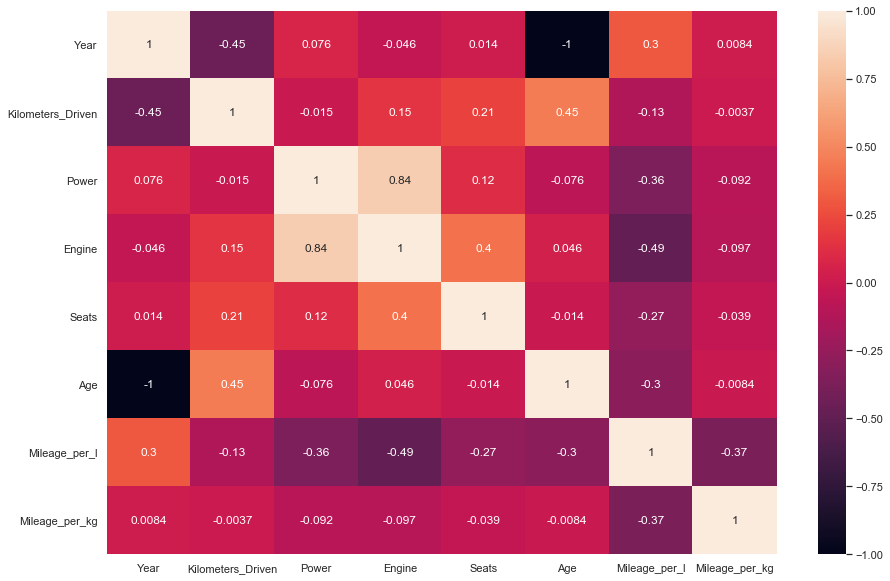

In [111]:
plt.figure(figsize= (15,10))
Formodel = Train[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Power','Engine','Seats','Age','Mileage_per_l','Mileage_per_kg' ]]
sns.heatmap(Formodel.corr(), annot=True)

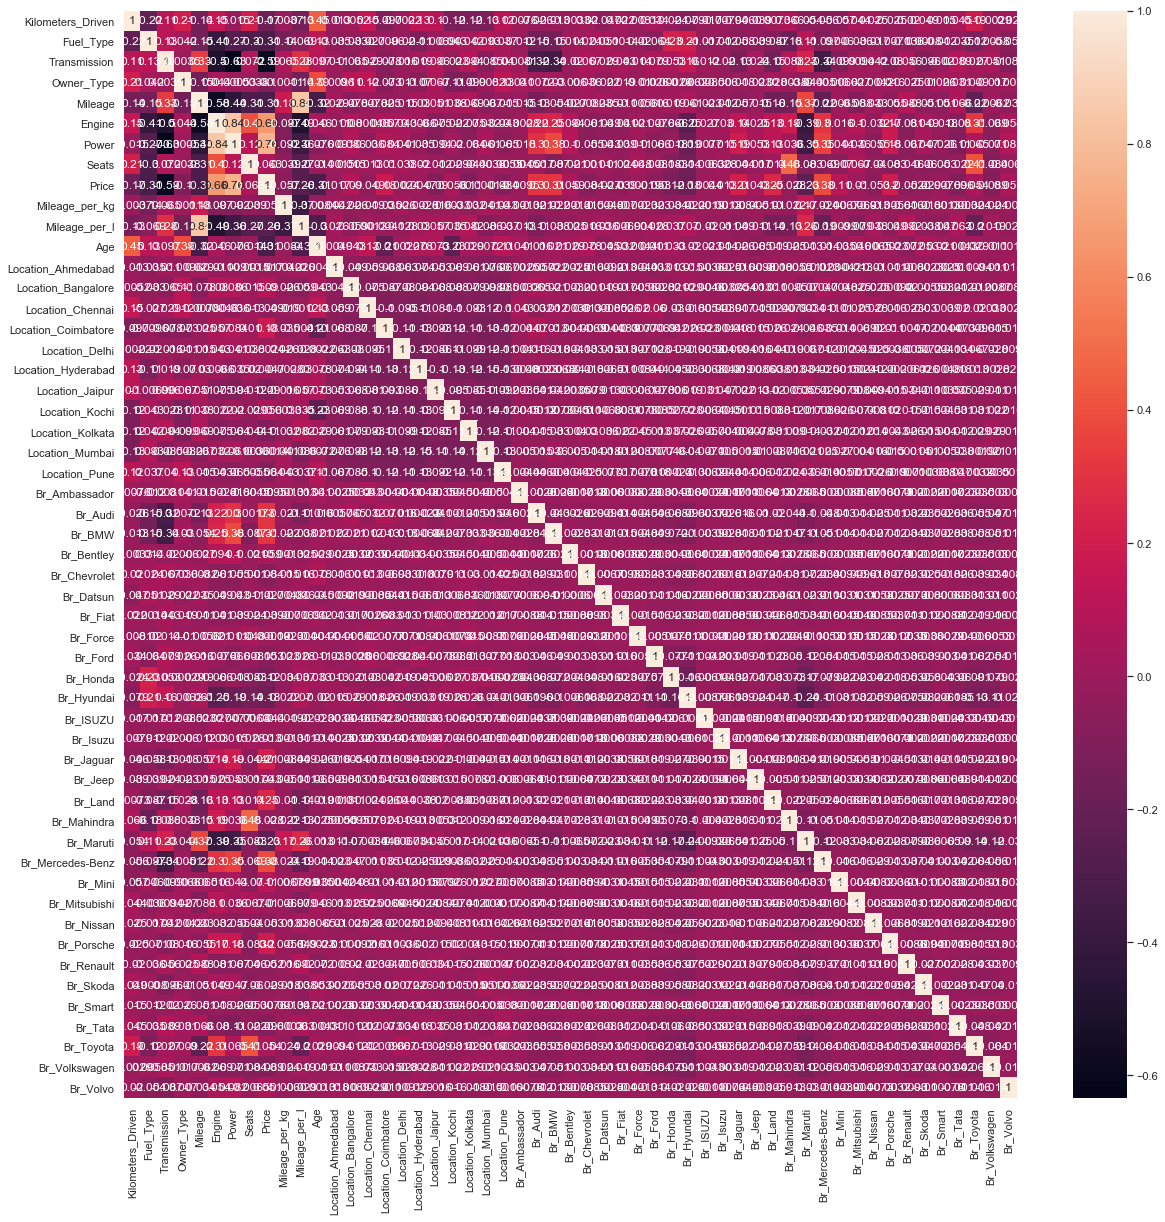

In [112]:
plt.figure(figsize= (20,20))

sns.heatmap(New_train.corr(), annot=True)

In [113]:
#creating new missing columns in train data
New_train['Br_Hindustan']=[0.0 for row in New_train.index]
New_train['Br_OpelCorsa']=[0.0 for row in New_train.index]

In [114]:
#Rearanging new missing columns in train data
mid = New_test['Br_Hindustan']
New_train.drop(labels=['Br_Hindustan'], axis=1,inplace = True)
New_train.insert(37, 'Br_Hindustan', mid)

mid = New_test['Br_OpelCorsa']
New_train.drop(labels=['Br_OpelCorsa'], axis=1,inplace = True)
New_train.insert(51, 'Br_OpelCorsa', mid)

New_train['Br_Hindustan']=[0.0 for row in New_train.index]
New_train['Br_OpelCorsa']=[0.0 for row in New_train.index]

New_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6018
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6015 non-null   object 
 1   Location             6015 non-null   object 
 2   Kilometers_Driven    6015 non-null   float64
 3   Fuel_Type            6015 non-null   float64
 4   Transmission         6015 non-null   float64
 5   Owner_Type           6015 non-null   float64
 6   Mileage              6015 non-null   float64
 7   Engine               6015 non-null   float64
 8   Power                6015 non-null   float64
 9   Seats                6015 non-null   float64
 10  Price                6015 non-null   float64
 11  Mileage_per_kg       6015 non-null   float64
 12  Mileage_per_l        6015 non-null   float64
 13  Brand                6015 non-null   object 
 14  Model                6015 non-null   object 
 15  Version              6015 non-null   o

In [115]:
#creating missing columns intest data 
New_test['Br_Ambassador']=[0.0 for row in New_test.index]
New_test['Br_Force']=[0.0 for i in New_test.index]

In [116]:
#Rearanging new missing columns in train data
mid = New_train['Br_Ambassador']
New_test.drop(labels=['Br_Ambassador'], axis=1,inplace = True)
New_test.insert(27, 'Br_Ambassador', mid)

mid = New_train['Br_Force']
New_test.drop(labels=['Br_Force'], axis=1,inplace = True)
New_test.insert(34, 'Br_Force', mid)

New_test['Br_Ambassador']=[0.0 for row in New_test.index]
New_test['Br_Force']=[0.0 for i in New_test.index]

New_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1234 non-null   object 
 1   Location             1234 non-null   object 
 2   Kilometers_Driven    1234 non-null   float64
 3   Fuel_Type            1234 non-null   float64
 4   Transmission         1234 non-null   float64
 5   Owner_Type           1234 non-null   float64
 6   Mileage              1234 non-null   float64
 7   Engine               1234 non-null   float64
 8   Power                1234 non-null   float64
 9   Seats                1234 non-null   float64
 10  Mileage_per_kg       1234 non-null   float64
 11  Mileage_per_l        1234 non-null   float64
 12  Brand                1234 non-null   object 
 13  Model                1234 non-null   object 
 14  Version              1234 non-null   object 
 15  Age                  1234 non-null   i

In [117]:
X=New_train.drop(['Price','Name','Brand','Location','Model','Version','Mileage',"Br_Smart"],axis=1)
y=New_train['Price']
X['Age']=X['Age'].astype(float)

X['Kilometers_Driven']=X['Kilometers_Driven'].astype(float)
X['Engine']=X['Engine'].astype(float)
X['Power']=X['Power'].astype(float)

X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6018
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_Driven    6015 non-null   float64
 1   Fuel_Type            6015 non-null   float64
 2   Transmission         6015 non-null   float64
 3   Owner_Type           6015 non-null   float64
 4   Engine               6015 non-null   float64
 5   Power                6015 non-null   float64
 6   Seats                6015 non-null   float64
 7   Mileage_per_kg       6015 non-null   float64
 8   Mileage_per_l        6015 non-null   float64
 9   Age                  6015 non-null   float64
 10  Location_Ahmedabad   6015 non-null   float64
 11  Location_Bangalore   6015 non-null   float64
 12  Location_Chennai     6015 non-null   float64
 13  Location_Coimbatore  6015 non-null   float64
 14  Location_Delhi       6015 non-null   float64
 15  Location_Hyderabad   6015 non-null   f

In [118]:
New_test=New_test.drop(['Name','Brand','Location','Model','Version','Mileage'],axis=1)
New_test['Age']=New_test['Age'].astype(float)

New_test['Kilometers_Driven']=New_test['Kilometers_Driven'].astype(float)
New_test['Engine']=New_test['Engine'].astype(float)
New_test['Power']=New_test['Power'].astype(float)

New_test

Kilometers_Driven  Fuel_Type  Transmission  Owner_Type    Engine  \
0              0.114410        0.0           1.0         0.0  0.069594   
1              0.153275        3.0           1.0         2.0  0.032006   
2              0.094556        1.0           1.0         0.0  0.329178   
3              0.395415        1.0           1.0         0.0  0.137700   
4              0.080229        3.0           1.0         0.0  0.106624   
...                 ...        ...           ...         ...       ...   
1229           0.253327        1.0           1.0         0.0  0.181243   
1230           0.166189        3.0           0.0         0.0  0.106624   
1231           0.077364        1.0           1.0         0.0  0.155750   
1232           0.146883        3.0           0.0         3.0  0.106624   
1233           0.204708        1.0           0.0         0.0  0.283588   

         Power  Seats  Mileage_per_kg  Mileage_per_l  Age  ...  Br_Mitsubishi  \
0     0.094481    4.0             1.0       0.000000  6.0  ...            0.0   
1     0.076786    5.0             0.0       0.869718  7.0  ...            0.0   
2     0.239935    7.0             0.0       0.481690  3.0  ...            0.0   
3     0.000000    5.0             0.0       0.830634  8.0  ...            0.0   
4     0.134497    5.0             0.0       0.651408  6.0  ...            0.0   
...        ...    ...             ...            ...  ...  ...            ...   
1229  0.168182    5.0             0.0       0.723239  9.0  ...            0.0   
1230  0.168182    5.0             0.0       0.605986  5.0  ...            0.0   
1231  0.102435    5.0             0.0       0.812676  8.0  ...            0.0   
1232  0.168182    5.0             0.0       0.605634  7.0  ...            0.0   
1233  0.275974    5.0             0.0       0.352113  6.0  ...            0.0   

      Br_Nissan  Br_OpelCorsa  Br_Porsche  Br_Renault  Br_Skoda  Br_Tata  \
0           0.0           0.0         0.0         0.0       0.0      0.0   
1           0.0           0.0         0.0         0.0       0.0      0.0   
2           0.0           0.0         0.0         0.0       0.0      0.0   
3           0.0           0.0         0.0         0.0       0.0      0.0   
4           0.0           0.0         0.0         0.0       0.0      0.0   
...         ...           ...         ...         ...       ...      ...   
1229        0.0           0.0         0.0         0.0       0.0      0.0   
1230        0.0           0.0         0.0         0.0       0.0      0.0   
1231        1.0           0.0         0.0         0.0       0.0      0.0   
1232        0.0           0.0         0.0         0.0       0.0      0.0   
1233        0.0           0.0         0.0         0.0       0.0      0.0   

      Br_Toyota  Br_Volkswagen  Br_Volvo  
0           0.0            0.0       0.0  
1           0.0            0.0       0.0  
2           1.0            0.0       0.0  
3           1.0            0.0       0.0  
4           0.0            0.0       0.0  
...         ...            ...       ...  
1229        0.0            1.0       0.0  
1230        0.0            1.0       0.0  
1231        0.0            0.0       0.0  
1232        0.0            1.0       0.0  
1233        0.0            0.0       0.0  

[1234 rows x 52 columns]

In [119]:
New_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_Driven    1234 non-null   float64
 1   Fuel_Type            1234 non-null   float64
 2   Transmission         1234 non-null   float64
 3   Owner_Type           1234 non-null   float64
 4   Engine               1234 non-null   float64
 5   Power                1234 non-null   float64
 6   Seats                1234 non-null   float64
 7   Mileage_per_kg       1234 non-null   float64
 8   Mileage_per_l        1234 non-null   float64
 9   Age                  1234 non-null   float64
 10  Location_Ahmedabad   1234 non-null   float64
 11  Location_Bangalore   1234 non-null   float64
 12  Location_Chennai     1234 non-null   float64
 13  Location_Coimbatore  1234 non-null   float64
 14  Location_Delhi       1234 non-null   float64
 15  Location_Hyderabad   1234 non-null   f

### Model

Cross validation

In [120]:
#Function for Predicting accuracy 
def Scr(Algo):
    scr=Algo.score(X_test,y_test)*100
    return (scr)

In [121]:
#k-fold cross-validation
def k_fold(model):
    k_folds = model_selection.KFold(n_splits=5, shuffle=False)
    scores = model_selection.cross_val_score(model, X_test, y_test, cv=k_folds, scoring='r2')
    Avg_Score=np.mean(scores)  
    return(Avg_Score)

In [122]:
#function for root mean square
def rmsle(y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

Splitting Data

In [123]:
#splitting the train-test data for validation

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=123)

In [124]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 1797 to 357
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_Driven    1203 non-null   float64
 1   Fuel_Type            1203 non-null   float64
 2   Transmission         1203 non-null   float64
 3   Owner_Type           1203 non-null   float64
 4   Engine               1203 non-null   float64
 5   Power                1203 non-null   float64
 6   Seats                1203 non-null   float64
 7   Mileage_per_kg       1203 non-null   float64
 8   Mileage_per_l        1203 non-null   float64
 9   Age                  1203 non-null   float64
 10  Location_Ahmedabad   1203 non-null   float64
 11  Location_Bangalore   1203 non-null   float64
 12  Location_Chennai     1203 non-null   float64
 13  Location_Coimbatore  1203 non-null   float64
 14  Location_Delhi       1203 non-null   float64
 15  Location_Hyderabad   1203 non-null  

Starting With Linear regresion model

In [125]:
#linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
#Predicting the test set results
y_pred_ls = linreg.predict(X_test)
print(linreg.score(X_test, y_test)*100,'% Prediction Accuracy')

74.4150910831166 % Prediction Accuracy


GBR Model

In [127]:
#GBR
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)

gbr.fit (X_train, y_train)

# get the predicted values from the test set
y_pred_gbr= gbr.predict(X_test)


In [128]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))

3.14691723057714

In [129]:
print(gbr.score(X_test, y_test)*100,'% Prediction Accuracy')

90.85523913296699 % Prediction Accuracy


XBG Model

In [130]:
#XGB

model_xgb = xgb.XGBRegressor(colsample_bytree=0.52, gamma=0.03, 
                             learning_rate=0.072, max_depth=6, 
                             min_child_weight=2, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.615, silent=1,
                             random_state =7, nthread = -1)

In [131]:
model_xgb.fit(X_train,y_train)
xg_t_pre= model_xgb.predict(X_train)
xg_pre=(model_xgb.predict(X_test))

In [132]:
y_predr = model_xgb.predict(X_test)
print(model_xgb.score(X_test, y_test)*100,'% Prediction Accuracy')

91.91123095589502 % Prediction Accuracy


Random Forest Model

In [133]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [134]:
predic = RF.predict(X_test)

In [135]:
y_pred_RF = RF.predict(X_test)
print(RF.score(X_test, y_test)*100,'% Prediction Accuracy')

90.73335425141312 % Prediction Accuracy


Lasso Model

In [136]:
#lasso
ls=Lasso()
ls.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [137]:
ls_predic = ls.predict(X_test)

In [138]:
print(ls.score(X_test, y_test)*100,'% Prediction Accuracy')

43.61205182332738 % Prediction Accuracy


LGB Model

In [139]:
lgb_model = lgb.LGBMRegressor(categorical_feature= [0,2,3,4,8,9,10],task = 'predict',application = 'regression',
                              objective = 'root_mean_squared_error',boosting_type="gbdt",num_iterations = 2500,
                              learning_rate = 0.05,num_leaves=15,tree_learner='feature',max_depth =10,min_data_in_leaf=7,
                              bagging_fraction = 1,bagging_freq = 100,reg_sqrt='True',metric ='rmse',feature_fraction = 0.6,
                              random_state=42)

lgb_model.fit(X_train,y_train)




LGBMRegressor(application='regression', bagging_fraction=1, bagging_freq=100,
              boosting_type='gbdt', categorical_feature=[0, 2, 3, 4, 8, 9, 10],
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.05, max_depth=10,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=7, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_iterations=2500, num_leaves=15,
              objective='root_mean_squared_error', random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, reg_sqrt='True', silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              task='predict', ...)

In [140]:
lgb_model_pred = lgb_model.predict(X_test)


In [141]:
print('model  ','Score  ','rmsle','k-fold' )
print('linreg',round(Scr(linreg),4),round(rmsle(y_pred_ls),4),round(k_fold(linreg),4))
print('gbr   ',round(Scr(gbr),4),round(rmsle(y_pred_gbr),4),round(k_fold(gbr),4))
print('xgb   ',round(Scr(model_xgb),4),round(rmsle(y_predr),4),round(k_fold(model_xgb),4))
print('RF    ',round(Scr(RF),4),round(rmsle(y_pred_RF),4),round(k_fold(RF),4))
print('ls    ',round(Scr(ls),4),round(rmsle(ls_predic),4),round(k_fold(ls),4))
print('lgb   ',round(Scr(lgb_model),4),round(rmsle(lgb_model_pred),4),round(k_fold(lgb_model),4))

model   Score   rmsle k-fold
linreg 74.4151 5.2637 0.7175
gbr    90.8552 3.1469 0.8761
xgb    91.9112 2.9597 0.8929
RF     90.7334 3.1678 0.8602
ls     43.6121 7.8143 0.4184
lgb    90.0046 3.29 0.8553


GBR ,RF and LGB are doing good but XGB Seems the best one.


So Using XGB for final Prediction

## Final Prediction 

In [142]:
prediction =model_xgb.predict(New_test) 
sol = pd.DataFrame({'Price': prediction })
sol = round(sol['Price'],2)

In [143]:
Test_copy['Prediction']=prediction
Test_copy['Prediction']=Test_copy['Prediction'].round(2)

In [144]:
writer = pd.ExcelWriter('Test_Final.xlsx', engine='xlsxwriter')
Test_copy.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [145]:
Test_copy.head(50)

Name    Location  Year  \
0                       Maruti Alto K10 LXI CNG       Delhi  2014   
1                 Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2     Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                          Toyota Etios Liva GD   Hyderabad  2012   
4                             Hyundai i20 Magna      Mumbai  2014   
5                        Mahindra XUV500 W8 2WD  Coimbatore  2016   
6           Toyota Fortuner 4x2 AT TRD Sportivo        Pune  2015   
7                          Hyundai EON Era Plus      Jaipur  2013   
8                           Honda City 1.5 S MT      Mumbai  2011   
9                        Mahindra XUV500 W6 2WD  Coimbatore  2015   
10                    Audi Q5 2008-2012 2.0 TDI      Mumbai  2012   
11                      Hyundai Grand i10 Magna      Jaipur  2016   
12                            Toyota Corolla H5     Chennai  2007   
13                       Maruti Swift Vdi BSIII  Coimbatore  2008   
14                            Nissan Terrano XL      Mumbai  2014   
15                             BMW X1 sDrive20d  Coimbatore  2013   
16             BMW 3 Series GT 320d Luxury Line   Hyderabad  2015   
17                  Ford Ikon 1.4 TDCi DuraTorq     Chennai  2009   
18                         Maruti Swift AMT ZXI       Kochi  2019   
19                       Maruti Swift Dzire VXi      Jaipur  2015   
20                              Maruti Ritz LDi        Pune  2016   
21                              Nissan Micra XV       Delhi  2010   
22                Maruti Alto 800 2016-2019 LXI       Kochi  2017   
23                 Skoda Laura 1.8 TSI Ambition   Bangalore  2009   
24       Honda Civic 2010-2013 1.8 S MT Inspire   Bangalore  2011   
25                          Ford Ikon 1.3 Flair        Pune  2005   
26                               Maruti Alto LX        Pune  2006   
27                      Honda Jazz 1.5 V i DTEC        Pune  2015   
28              Skoda Rapid 1.5 TDI AT Ambition       Delhi  2015   
29                       Hyundai i20 1.2 Sportz      Mumbai  2011   
30                   Toyota Etios Cross 1.4L VD     Chennai  2014   
31                       Volkswagen Polo GT TDI        Pune  2014   
32                 Hyundai i10 Era 1.1 iTech SE        Pune  2010   
33                    Mitsubishi Pajero 2.8 SFX     Chennai  2012   
34                  Maruti Swift Dzire Tour LDI     Kolkata  2015   
35                       Maruti Swift Dzire VXI     Chennai  2015   
36                 Skoda Rapid 1.6 MPI AT Style      Mumbai  2017   
37   Hyundai Creta 1.6 SX Plus Dual Tone Petrol   Bangalore  2016   
38  Toyota Innova 2.5 G (Diesel) 7 Seater BS IV        Pune  2010   
39                BMW 5 Series 520d Luxury Line      Mumbai  2012   
40                      Maruti Baleno Alpha 1.3   Ahmedabad  2018   
41   Audi A4 2.0 TDI 177 Bhp Technology Edition        Pune  2013   
42                  Audi A4 2.0 TDI Multitronic   Hyderabad  2013   
43                 Skoda Rapid 1.6 MPI Ambition      Jaipur  2018   
44                       Maruti Ertiga SHVS VDI       Kochi  2017   
45                         Maruti Ciaz 1.4 Zeta      Mumbai  2017   
46                              Maruti Ciaz ZXi        Pune  2014   
47         Mercedes-Benz A Class A200 CDI Sport     Chennai  2015   
48         Toyota Innova 2.5 ZX Diesel 7 Seater       Kochi  2015   
49                   BMW 3 Series 320d Prestige   Ahmedabad  2014   

    Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0               40929       CNG       Manual      First  32.26 km/kg   998 CC   
1               54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2               34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3              139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4               29000    Petrol       Manual      First    18.5 kmpl  1197 CC   
5               85609    Diesel      